In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
library(e1071)
library(class)
library(rpart)
library(caret)
library(nnet)
library(dplyr)
library(stringr)
library(plotrix)
library(NbClust)
library(randomForest)

필요한 패키지를 로딩중입니다: ggplot2

필요한 패키지를 로딩중입니다: lattice


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


다음의 패키지를 부착합니다: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




## 사용할 데이터 
polo
golf
tiguan

Ford_Focus
Ford_Fiesta
Ford_Mondeo

In [3]:
polo <- read.csv("./file/polo.csv")
golf <- read.csv("./file/golf.csv")
tiguan <- read.csv("./file/tiguan.csv")
Ford_Focus <- read.csv("./file/Ford_Focus.csv")
Ford_Fiesta <- read.csv("./file/Ford_Fiesta.csv")
Ford_Mondeo <- read.csv("./file/Ford_Mondeo.csv")

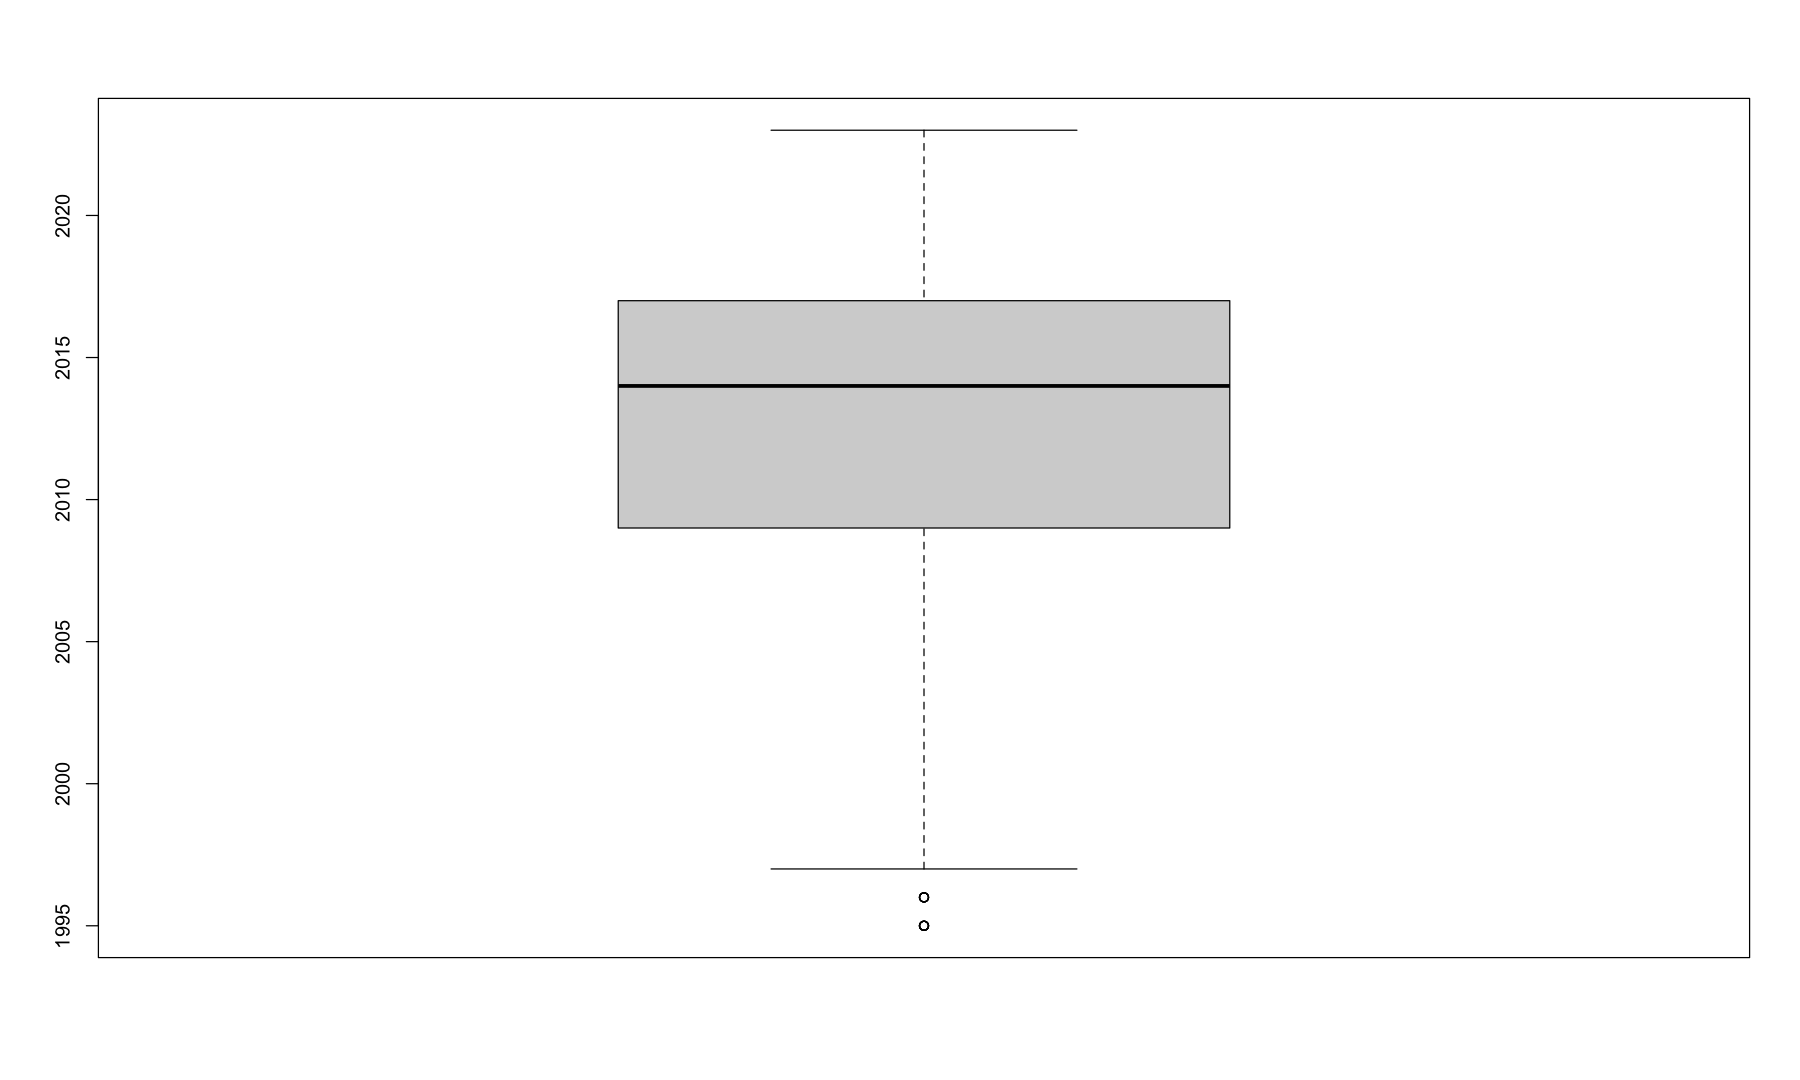

In [27]:
#golf
par(bg = 'white')

boxplot(golf$year)

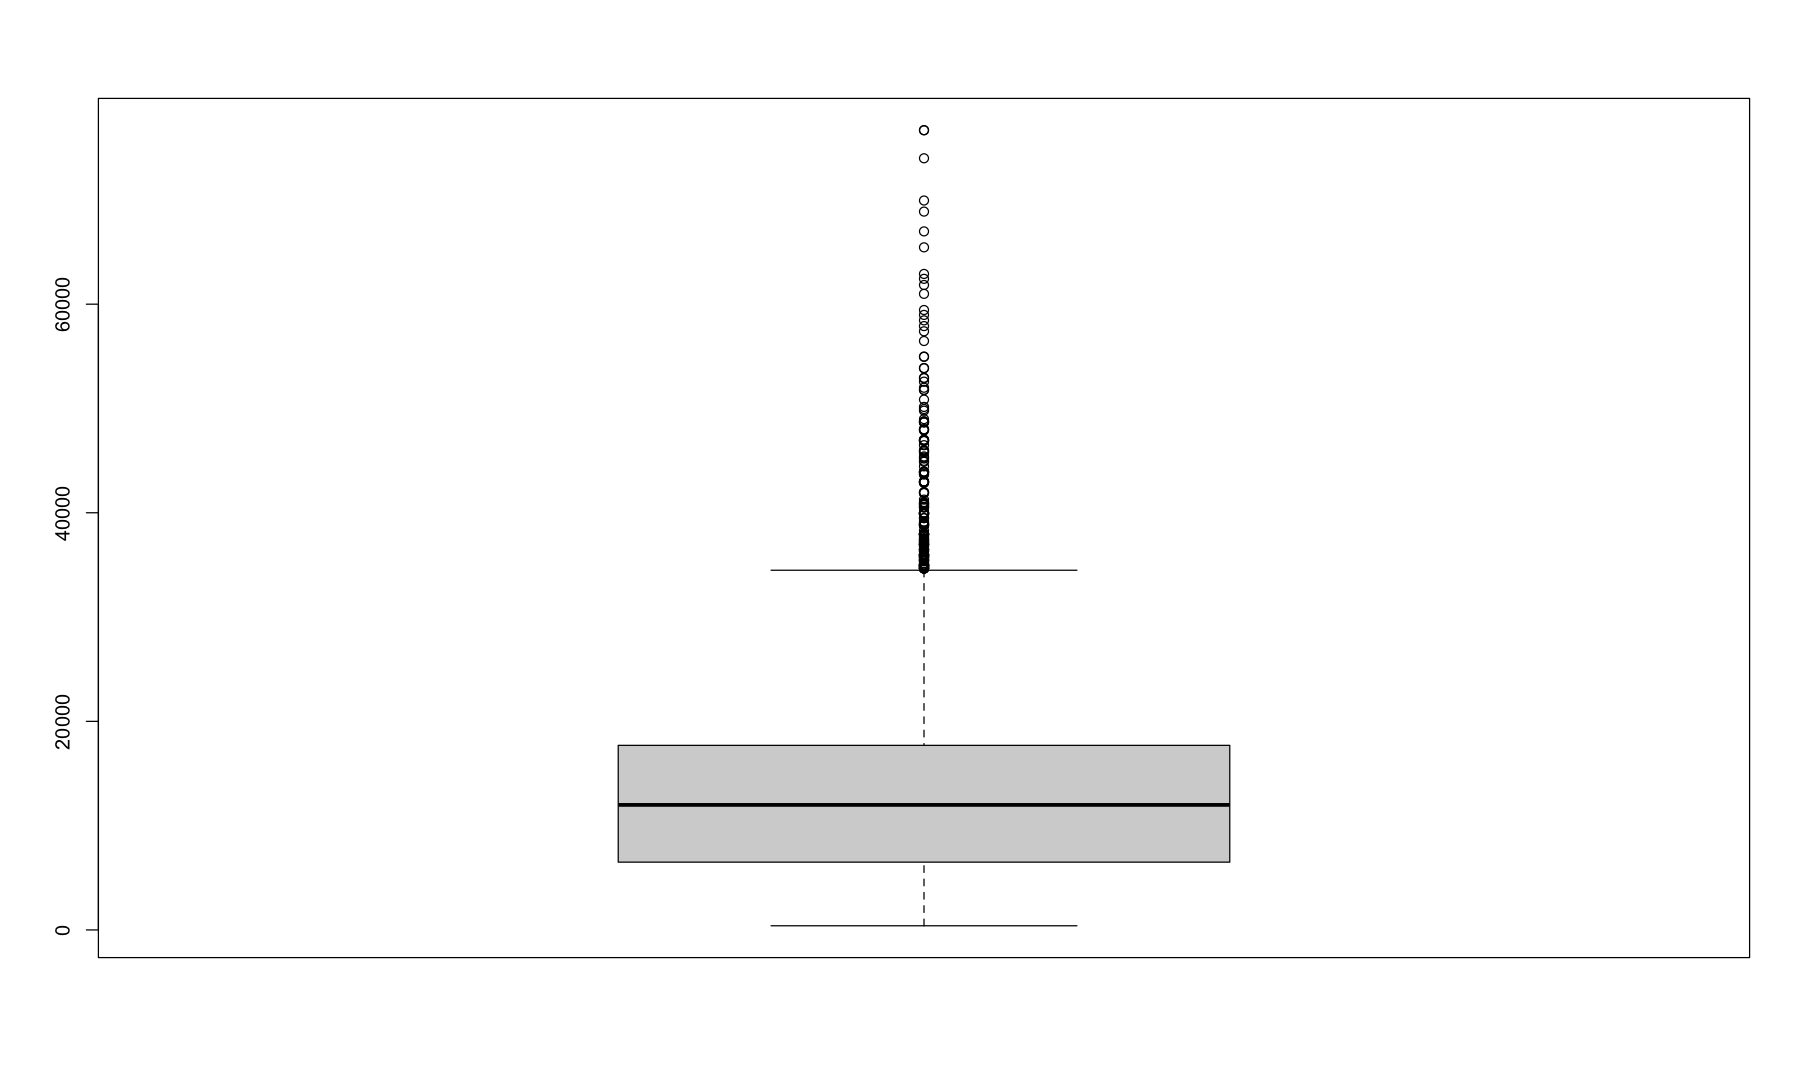

In [31]:
par(bg = 'white')

boxplot(golf$price_in_euro)

In [30]:
golf <- subset(golf, price_in_euro != 97050)
table(golf$price_in_euro)


  399   400   490   500   550   590   599   600   650   670   685   700   750 
    1     1     1     2     1     1     1     4     1     1     1     2     4 
  790   800   830   850   900   950   980   990   999  1000  1100  1130  1150 
    1     2     2     9     4     1     1     4     9     5     7     1     1 
 1199  1200  1250  1290  1299  1300  1350  1390  1399  1400  1450  1480  1490 
    1    15     6     2     2     6     1     2     3     3     5     1     6 
 1495  1499  1500  1550  1570  1590  1599  1600  1650  1690  1699  1700  1750 
    1     3    19     5     1     1     2    11     2     1     6    10     4 
 1777  1790  1799  1800  1850  1866  1880  1890  1900  1950  1980  1985  1990 
    1     4     5    15     7     1     1     5     8     7     3     1    12 
 1999  2000  2050  2100  2150  2180  2195  2199  2200  2222  2250  2290  2299 
   20    22     1     5     1     1     2     3    19     1     5     3     5 
 2300  2350  2390  2399  2400  2450  2480  2490  24

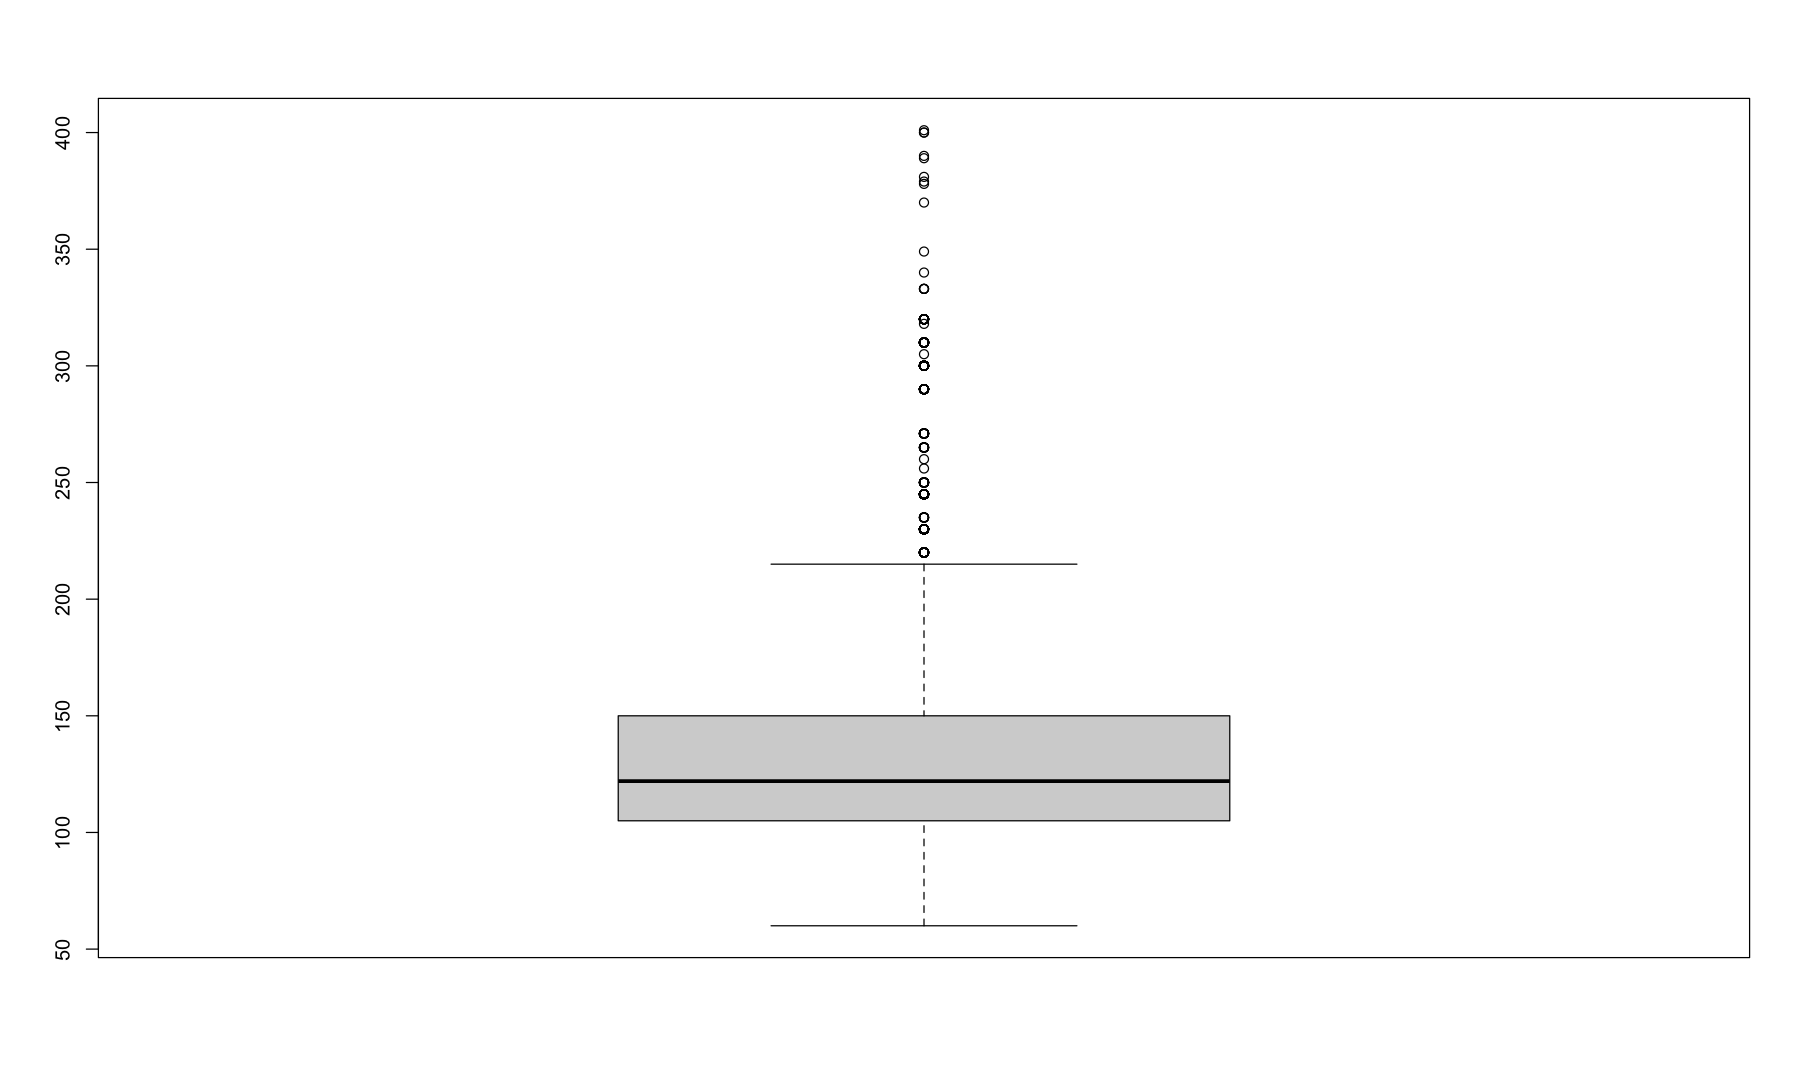

In [35]:
par(bg = 'white')
boxplot(golf$power_ps)

In [34]:
golf <- subset(golf, power_ps != 745 )
golf <- subset(golf, power_ps != 521 )
golf <- subset(golf, power_ps != 480 )
table(golf$power_ps)


 60  64  68  75  80  86  90  98 101 102 105 106 110 116 122 125 126 131 140 145 
  5   1   3 385 381 335  59   2  61 235 857   1 537 365 456 261   1 210 273   1 
150 160 170 174 179 184 190 200 204 211 215 220 230 235 245 250 256 260 265 271 
932 133  80   2   6 245  21  42   3  58   1  53 100  10 137  20   1   1  13  20 
290 300 305 310 318 320 333 340 349 370 378 379 381 389 390 400 401 
 33 111   1  47   1  30   4   1   1   1   1   1   1   1   1   2   1 

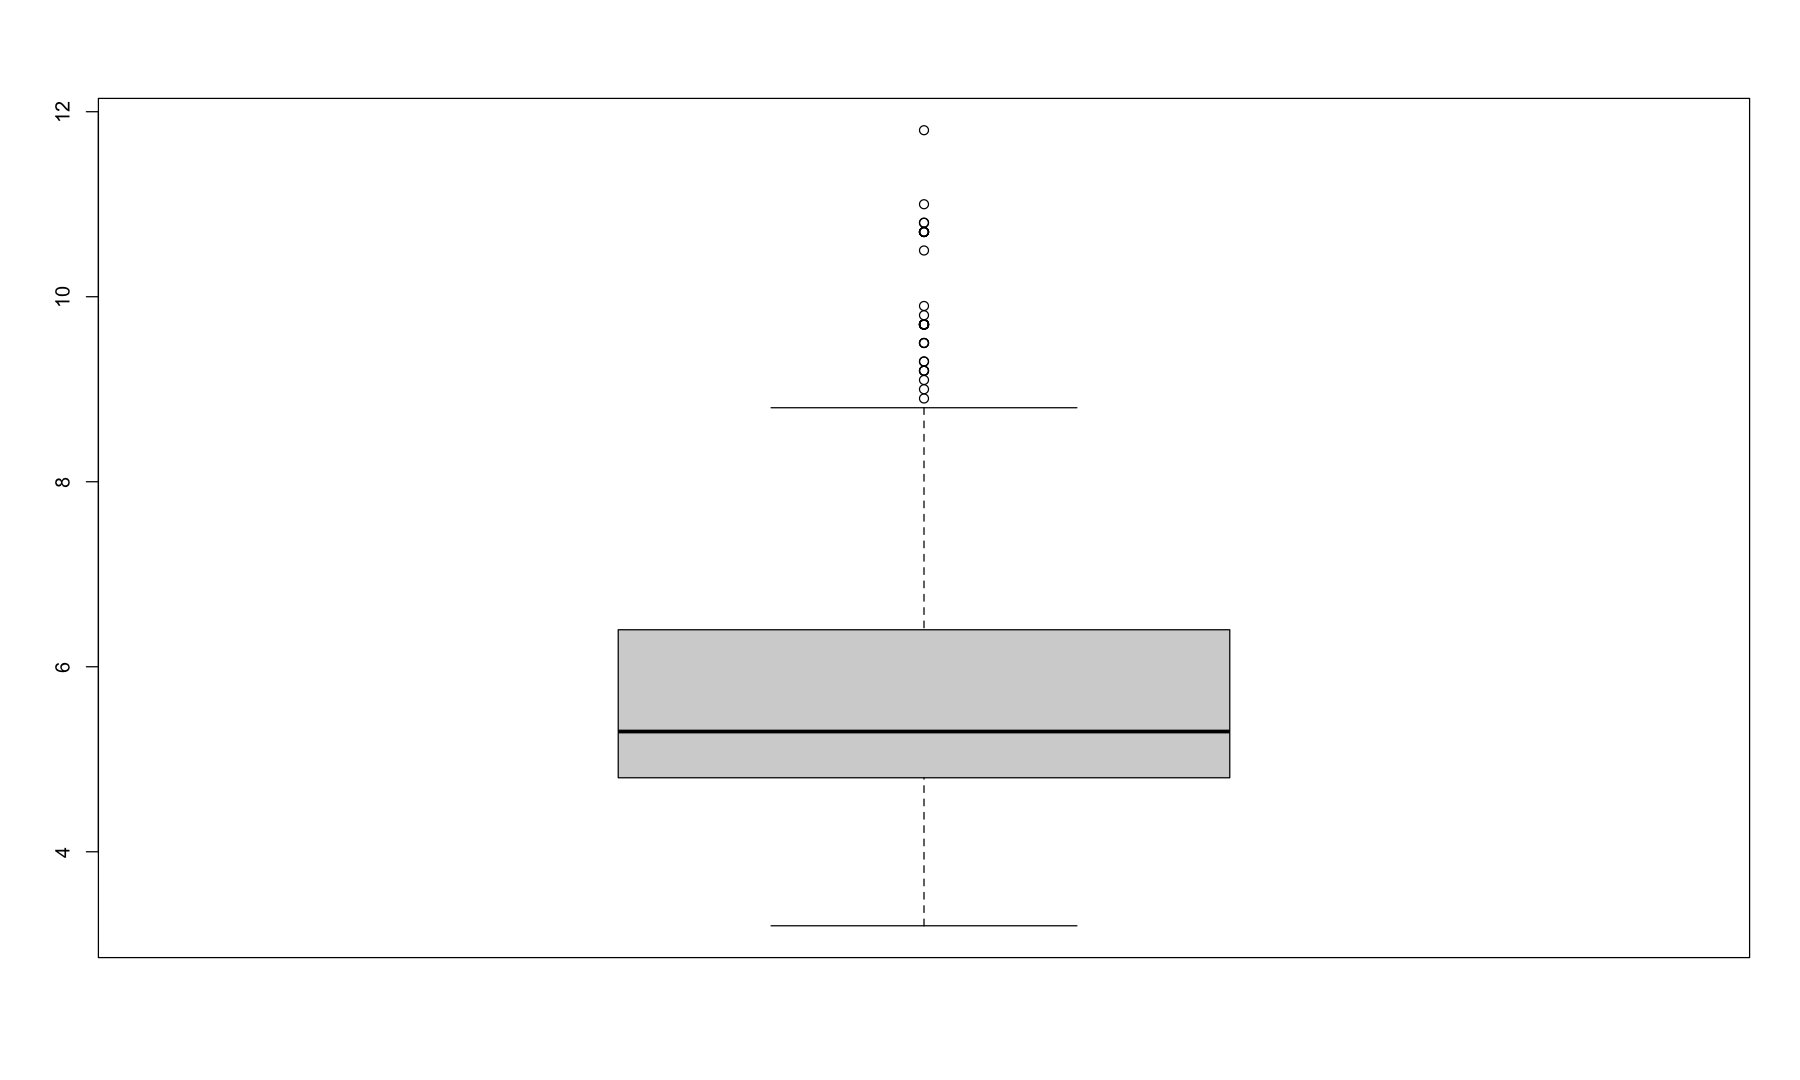

In [41]:
par(bg = 'white')
boxplot(golf$fuel_consumption_l_100km)

In [40]:
golf <- subset(golf, fuel_consumption_l_100km != 130 )
golf <- subset(golf, fuel_consumption_l_100km != 1 )
golf <- subset(golf, fuel_consumption_l_100km != 1.1 )
golf <- subset(golf, fuel_consumption_l_100km != 1.5 )
table(golf$fuel_consumption_l_100km)


 3.2  3.3  3.4  3.5  3.7  3.8  3.9    4  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8 
   5    1    8    8   13  134  129   89  240  182   71  130  299   45  114  294 
 4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9    6  6.1  6.2  6.3  6.4 
 524  338  239  377  133  129  177   36  126   77   87  165   19  212  227  334 
 6.5  6.6  6.7  6.8  6.9    7  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9    8 
  90  194   78  152  304   45  103   51   77  136   13   56   26   20   57   43 
 8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9    9  9.1  9.2  9.3  9.5  9.7  9.8 
  20   16    4   28   15    8    3    3    1    1    1    3    2    3   11    1 
 9.9 10.5 10.7 10.8   11 11.8 
   1    1    7    2    1    1 

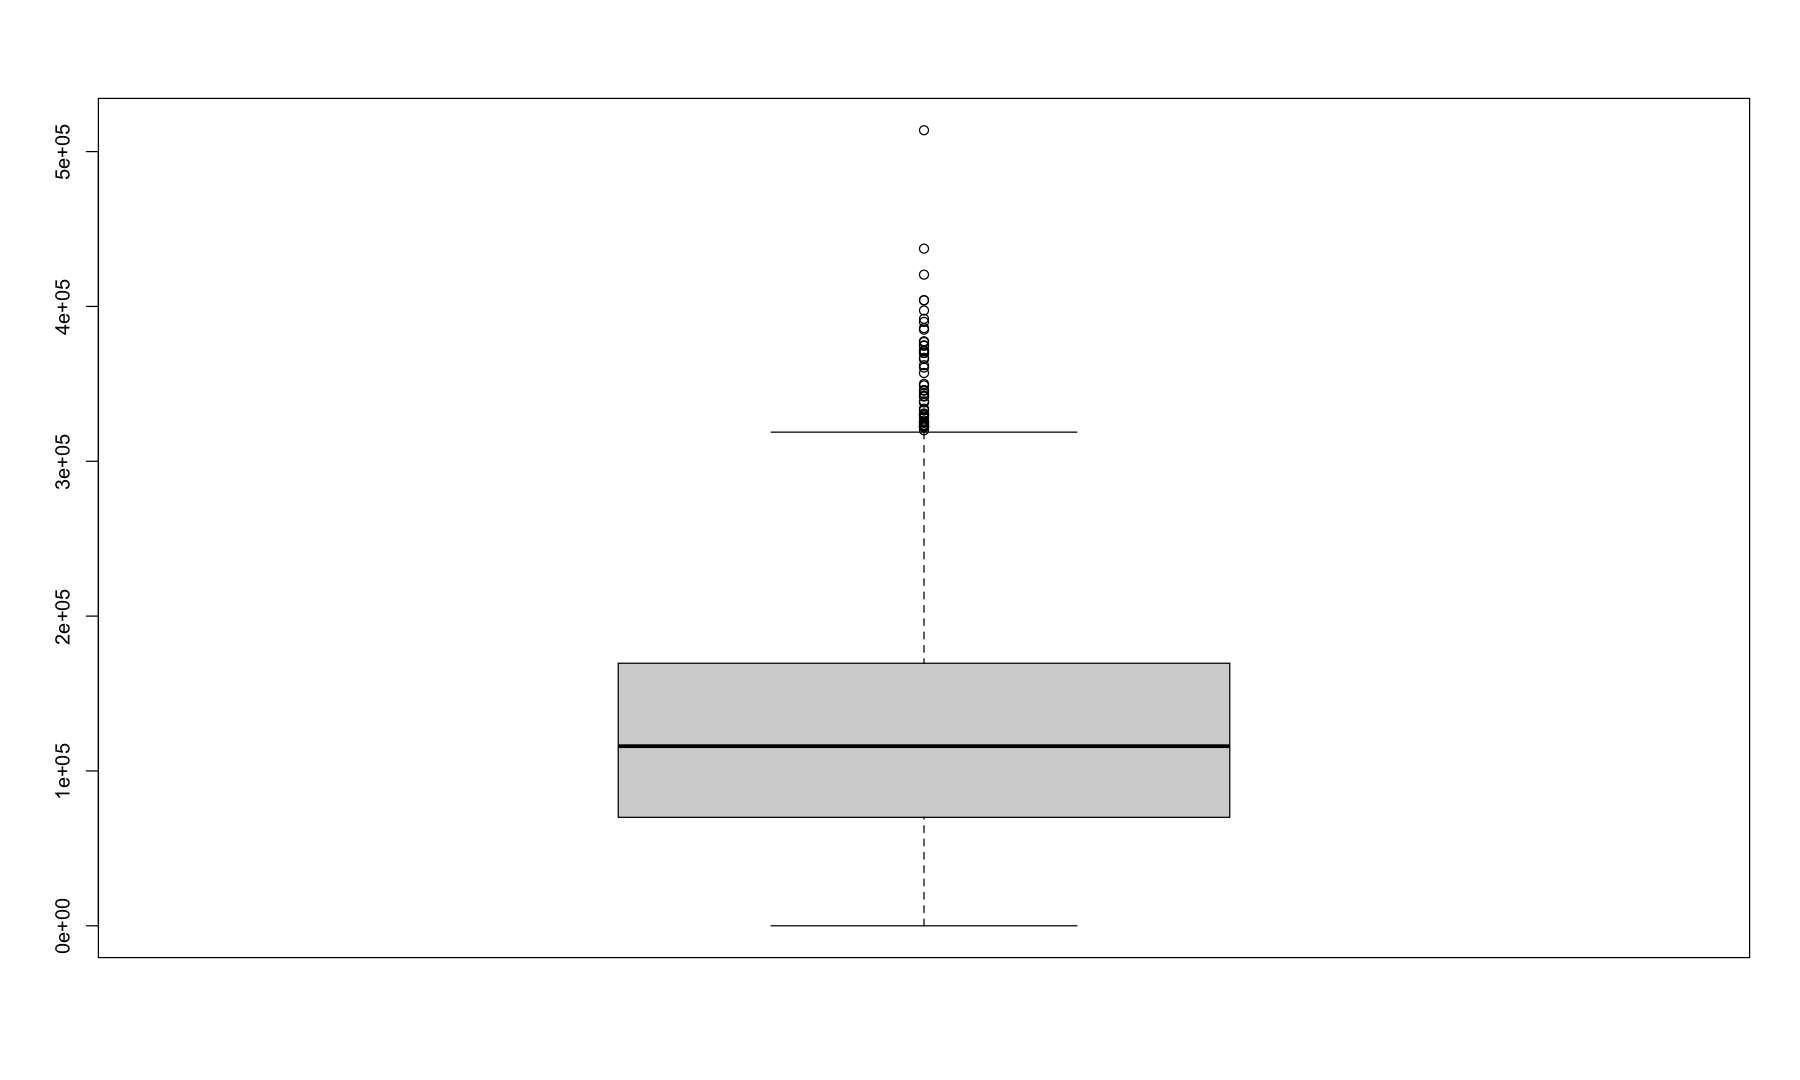

In [45]:
par(bg = 'white')
boxplot(golf$mileage_in_km)

In [44]:
golf <- subset(golf, mileage_in_km != 2013000 )
table(golf$mileage_in_km)


     0      1      5      6      9     10     13     15     19     20     23 
     1      1      1      2      2     23      1      5      1      8      1 
    30     33     40     50     55     60     80    100    125    150    200 
     7      1      1     11      1      1      1      4      3      1      4 
   300    334    400    500    583    619    680    789    866    937   1000 
     1      1      1      1      1      1      1      1      1      1      4 
  1001   1004   1010   1060   1250   1300   1500   1565   1700   1725   1734 
     1      1      1      1      1      2      6      1      1      1      1 
  1750   1846   2100   2147   2200   2203   2300   2365   2458   2500   2559 
     1      1      1      1      1      1      1      1      1      4      1 
  2580   2700   2767   2768   2782   2990   2999   3000   3050   3119   3313 
     1      1      1      1      1      2      1      2      1      2      1 
  3500   3600   3641   3720   3781   3864   3869   3900   3920 

In [46]:
# 객관식 함수 모음
myTest <- function(A, dataName, coln, ntreecount, per) {
  result <- numeric(A) 
  result2 <- numeric(A) 

cat("------------------------------------\n")
cat("예측율\n")
# 라이브러리 받기
library(caret)
library(e1071)
library(nnet)
library(randomForest)
for(i in 1:A) {
sampA <- createDataPartition(dataName$price_in_euro, p = per, list = F)
# 학습용    
data.trA <- dataName[sampA,]
# 검증용
data.testA <- dataName[-sampA,]
# 문제
xA <- subset(data.testA, select = - price_in_euro)
# 답
yA <- data.testA$price_in_euro
# 문제풀기  ( 랜덤 포레스트)
rfA <- randomForest(price_in_euro ~ ., data=data.trA, ntree = ntreecount )
# ( SVM )
model <- svm(price_in_euro ~ ., data=data.trA)
# 인공신경망
model.nnet <- nnet(price_in_euro ~ ., data=data.trA, size = 3) # size : 층 갯수 

# 예측
# 랜덤 포레스트
predA <- predict(rfA, xA)

# SVM
pred2A <- predict(model,xA)

# 랜덤 포레스트


  mape <- 100 -(mean(abs((predA - yA) / yA)) * 100)
  mape2 <- 100 -(mean(abs((pred2A - yA) / yA)) * 100)

 result[i] <- mape
 result2[i] <- mape2

  cat(i, "번째 MAPE RandomForest:", round(mape, 2), "%\n")
  cat(i, "번째 MAPE SVM:", round(mape2, 2), "%\n")
}
# SVM




cat("------------------------------------\n")
cat("평균 MAPE RandomForest:", round(mean(result), 2), "%\n")
cat("평균 MAPE SVM:", round(mean(result2), 2), "%\n")
cat("------------------------------------\n")

}

In [47]:
myTest(A = 10, dataName = golf, coln = 5, ntreecount = 150,per = 0.7) 

------------------------------------
예측율
# weights:  43
initial  value 1206770162138.518311 
final  value 1206706608782.000000 
converged
1 번째 MAPE RandomForest: 84.08 %
1 번째 MAPE SVM: 84.77 %
# weights:  43
initial  value 1206928691325.779297 
final  value 1206875147648.000000 
converged
2 번째 MAPE RandomForest: 84.26 %
2 번째 MAPE SVM: 84.61 %
# weights:  43
initial  value 1200762440455.725098 
final  value 1200693862511.000000 
converged
3 번째 MAPE RandomForest: 84.76 %
3 번째 MAPE SVM: 85.03 %
# weights:  43
initial  value 1184774752378.506348 
final  value 1184701646350.000000 
converged
4 번째 MAPE RandomForest: 84.41 %
4 번째 MAPE SVM: 85.32 %
# weights:  43
initial  value 1156226546312.879883 
final  value 1156148572634.000000 
converged
5 번째 MAPE RandomForest: 84.92 %
5 번째 MAPE SVM: 85.18 %
# weights:  43
initial  value 1184304912746.495117 
final  value 1184268960884.000000 
converged
6 번째 MAPE RandomForest: 84.31 %
6 번째 MAPE SVM: 84.6 %
# weights:  43
initial  value 1214933272504.6105

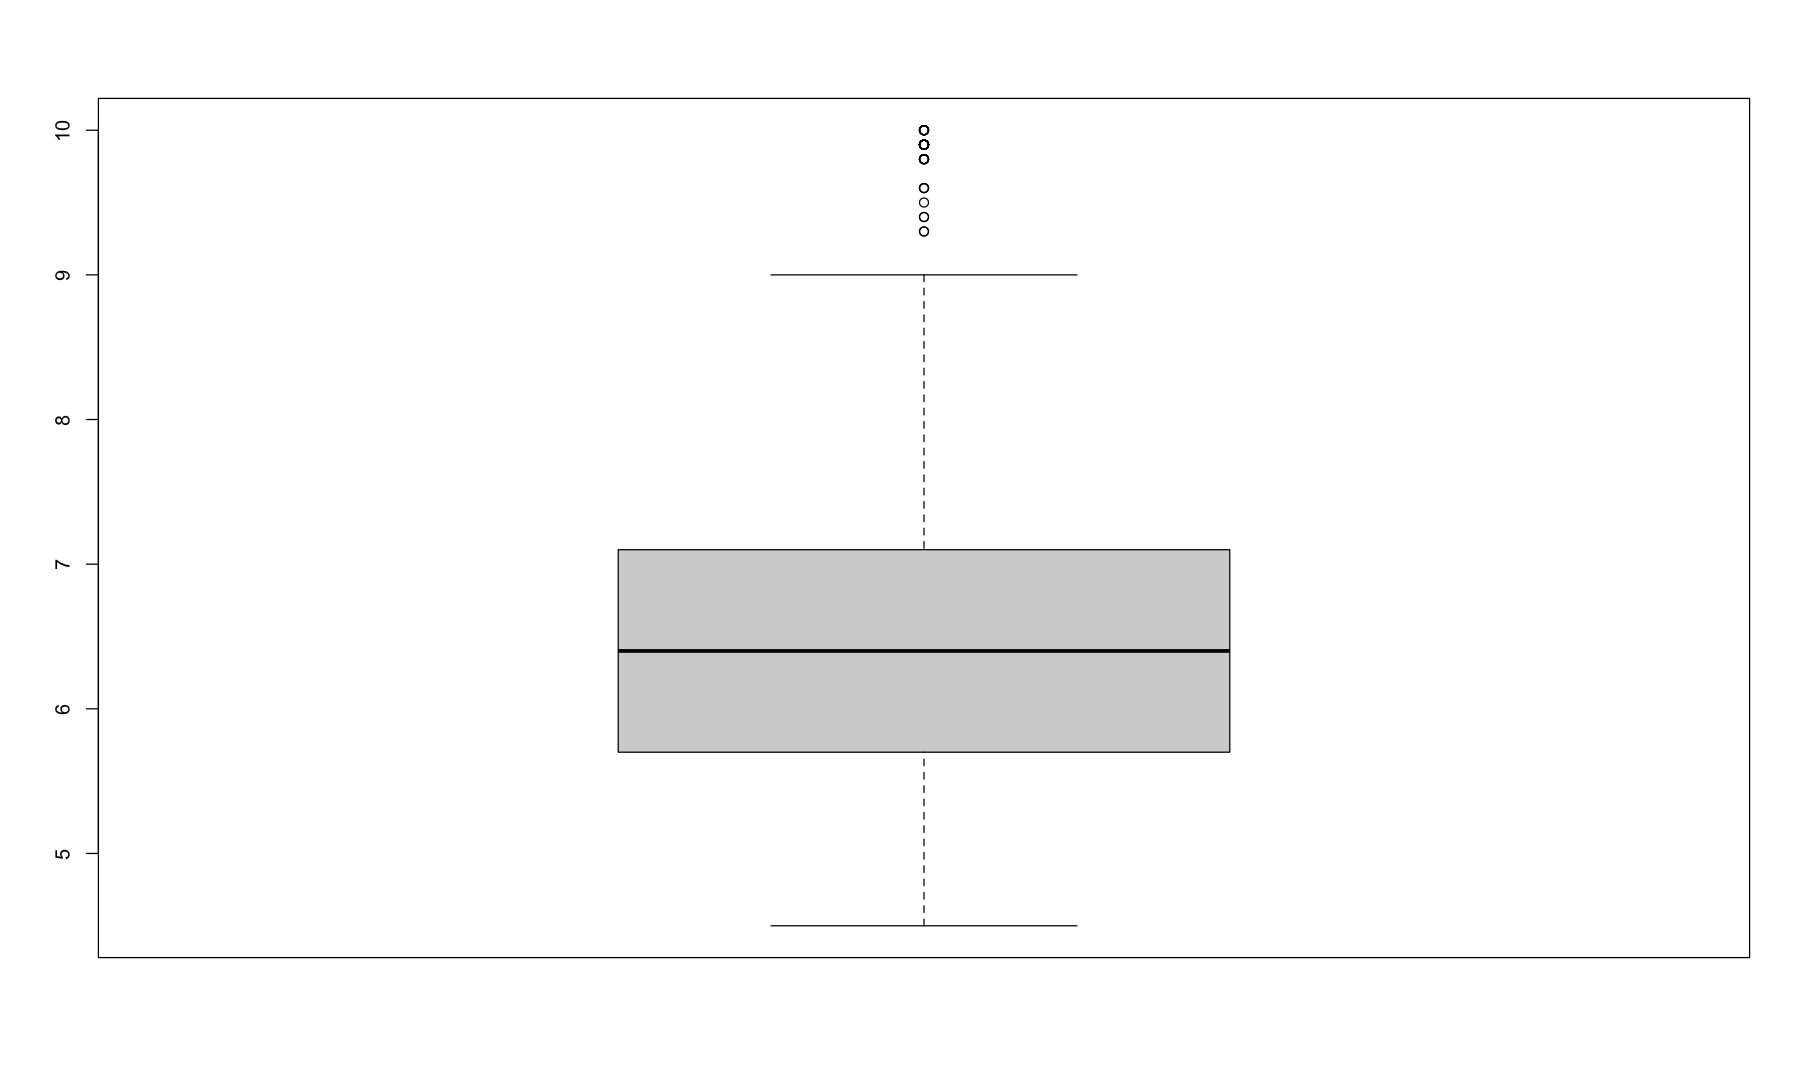

In [51]:

par(bg = 'white')
boxplot(tiguan$fuel_consumption_l_100km)

In [50]:
tiguan <- subset(tiguan,fuel_consumption_l_100km != 61 )
tiguan <- subset(tiguan,fuel_consumption_l_100km != 1 )
table(tiguan$fuel_consumption_l_100km)


4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.2 6.3 6.4 
  5   1  22  62  38  22   3   2 109  18  15  29 142  79  61  66  44  19  60  91 
6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9   8 8.1 8.2 8.3 8.4 
109  15  78  15  39  24 100  34  32  46  14  20  16  11   1  39  18   2   1  32 
8.5 8.6 8.7 8.8 8.9   9 9.3 9.4 9.5 9.6 9.8 9.9  10 
 37  26   5   4  16   5   2   2   1   3   7  18   9 

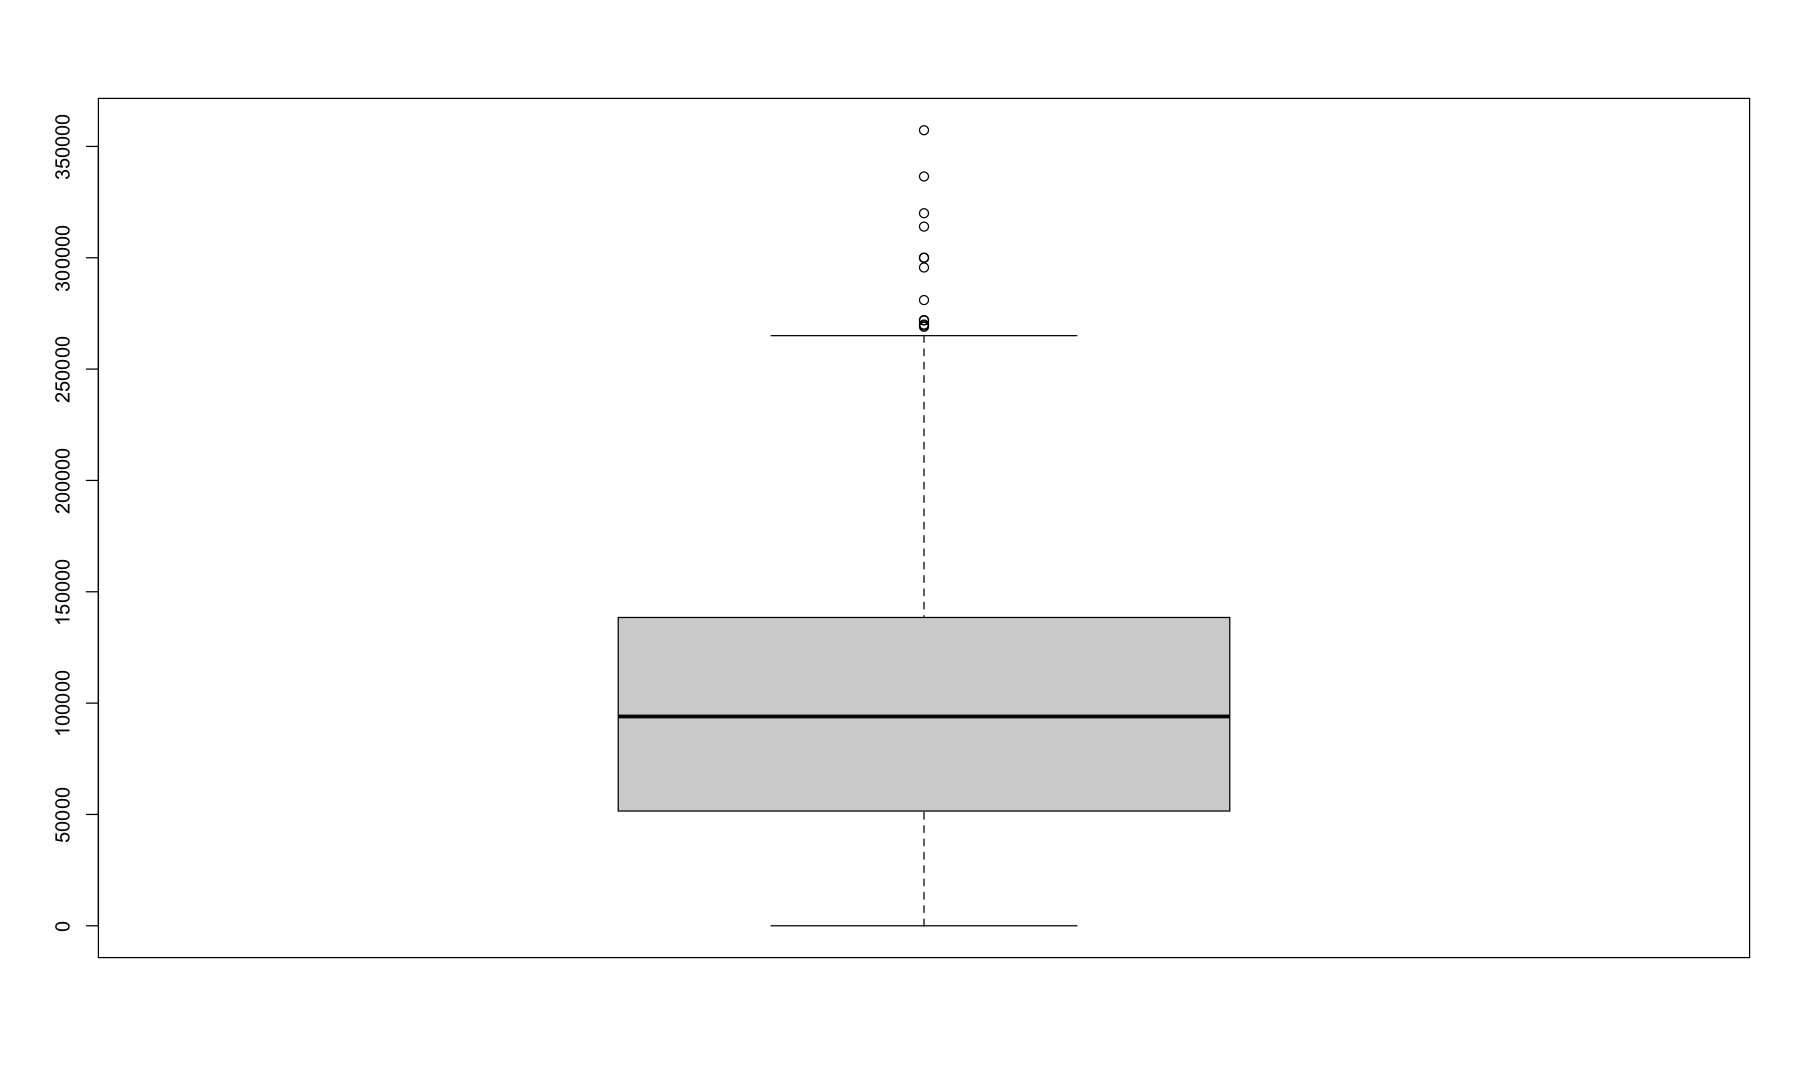

In [56]:
par(bg = 'white')
boxplot(tiguan$mileage_in_km)

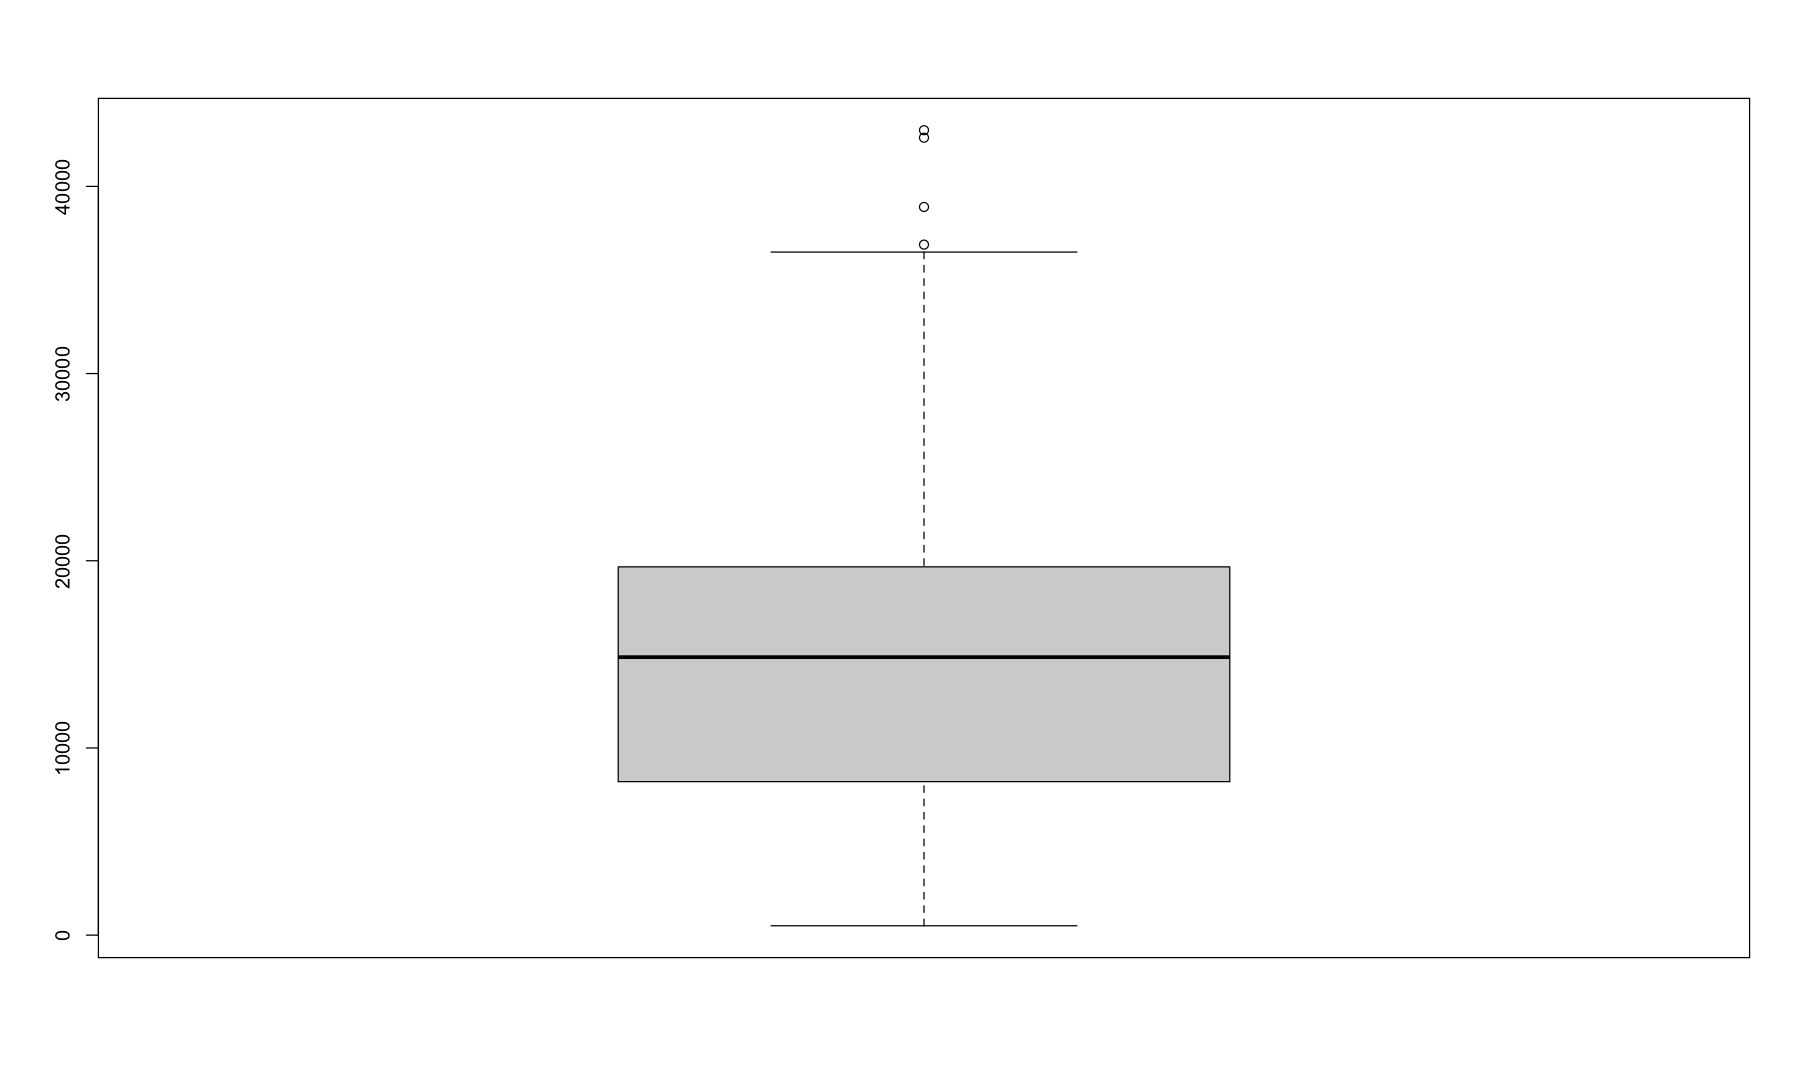

In [61]:
#Ford_Mondeo
par(bg = 'white')
boxplot(Ford_Mondeo$price_in_euro)

In [60]:
Ford_Mondeo <- subset(Ford_Mondeo, price_in_euro != 60400)
table(Ford_Mondeo$price_in_euro)


  500   700   750   799   800   900  1000  1050  1100  1149  1150  1200  1250 
    2     2     1     2     2     1     2     1     1     1     1     3     2 
 1299  1300  1490  1500  1590  1600  1699  1700  1790  1800  1850  1999  2000 
    1     3     1     1     1     1     1     3     1     2     1     1     4 
 2100  2150  2200  2222  2250  2290  2300  2350  2390  2399  2400  2499  2500 
    2     1     2     1     2     1     2     1     1     1     1     3     1 
 2590  2600  2650  2700  2799  2800  2900  2950  2985  2990  2999  3000  3100 
    1     2     1     1     2     2     3     1     1     3     3     1     1 
 3200  3250  3299  3300  3400  3450  3499  3500  3590  3695  3699  3700  3790 
    2     1     1     2     1     2     1     7     1     1     2     1     2 
 3800  3850  3899  3900  3999  4000  4100  4200  4250  4280  4290  4295  4299 
    3     1     1     1     2     4     4     1     1     1     1     1     1 
 4300  4400  4490  4499  4500  4650  4700  4750  47

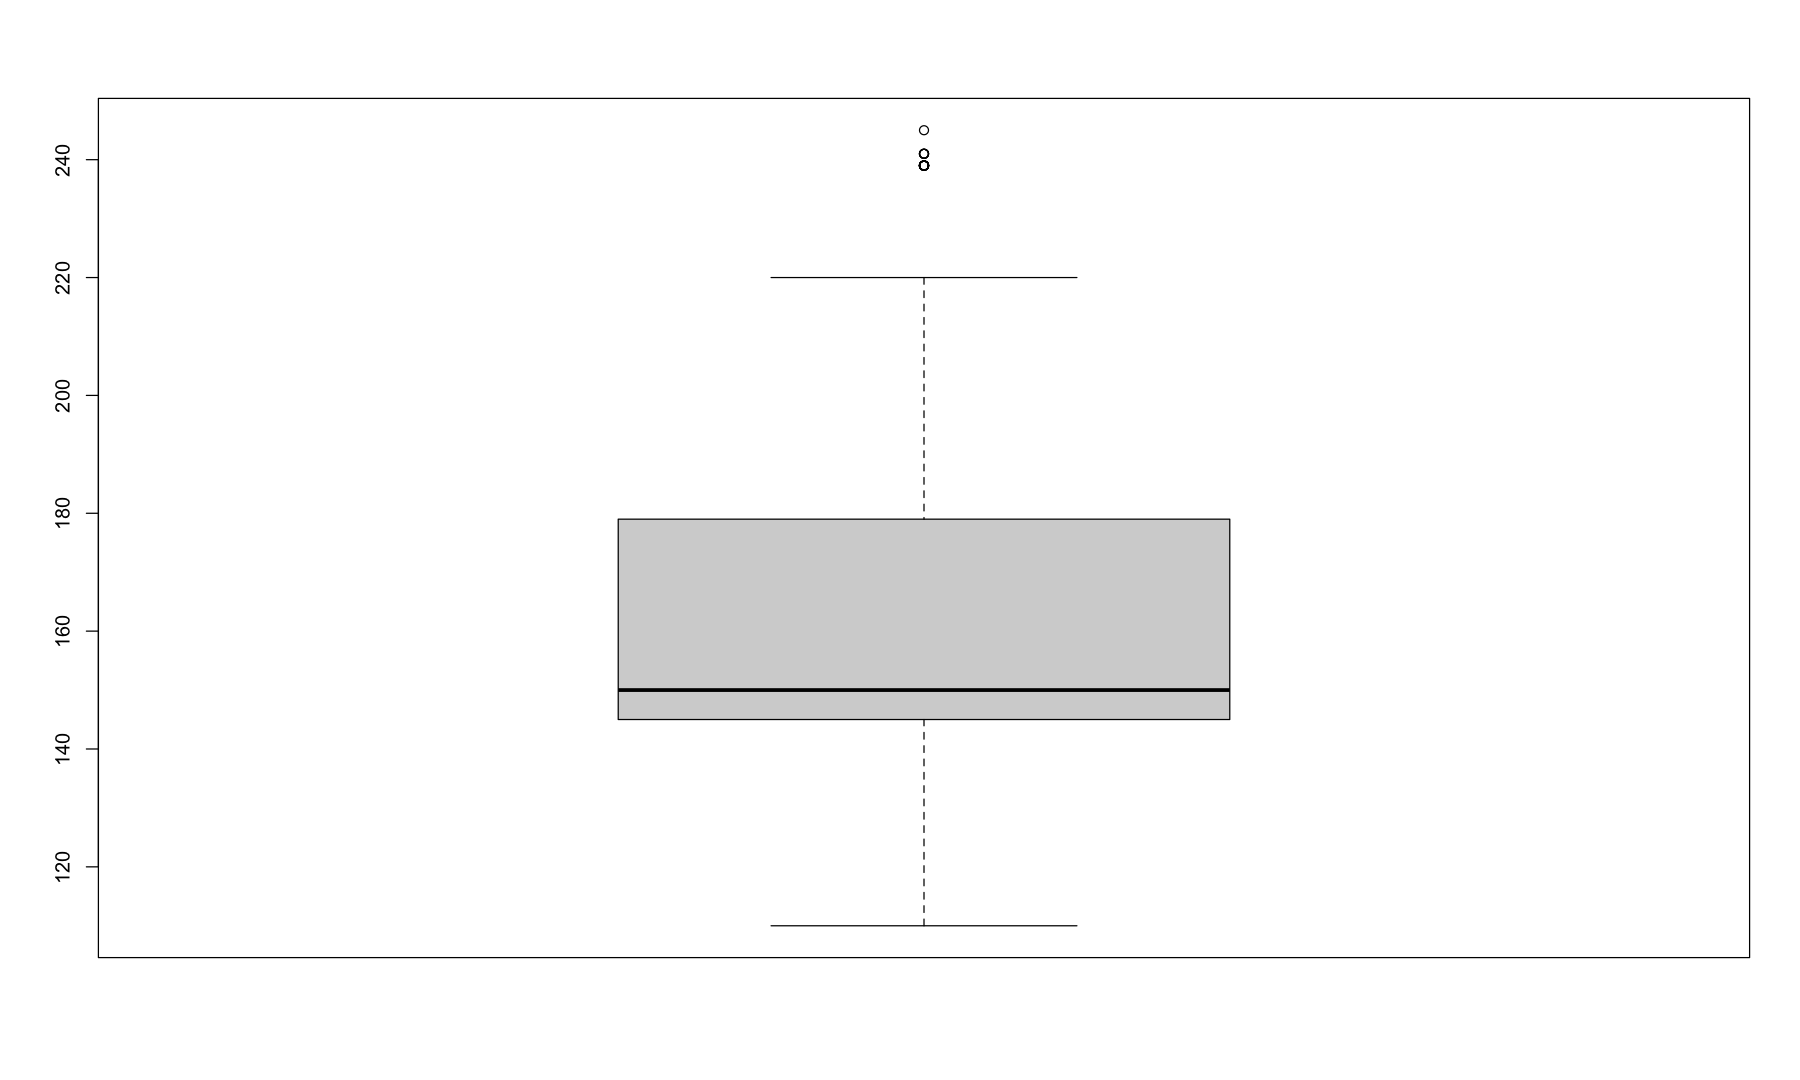

In [62]:
par(bg = 'white')
boxplot(Ford_Mondeo$power_ps)

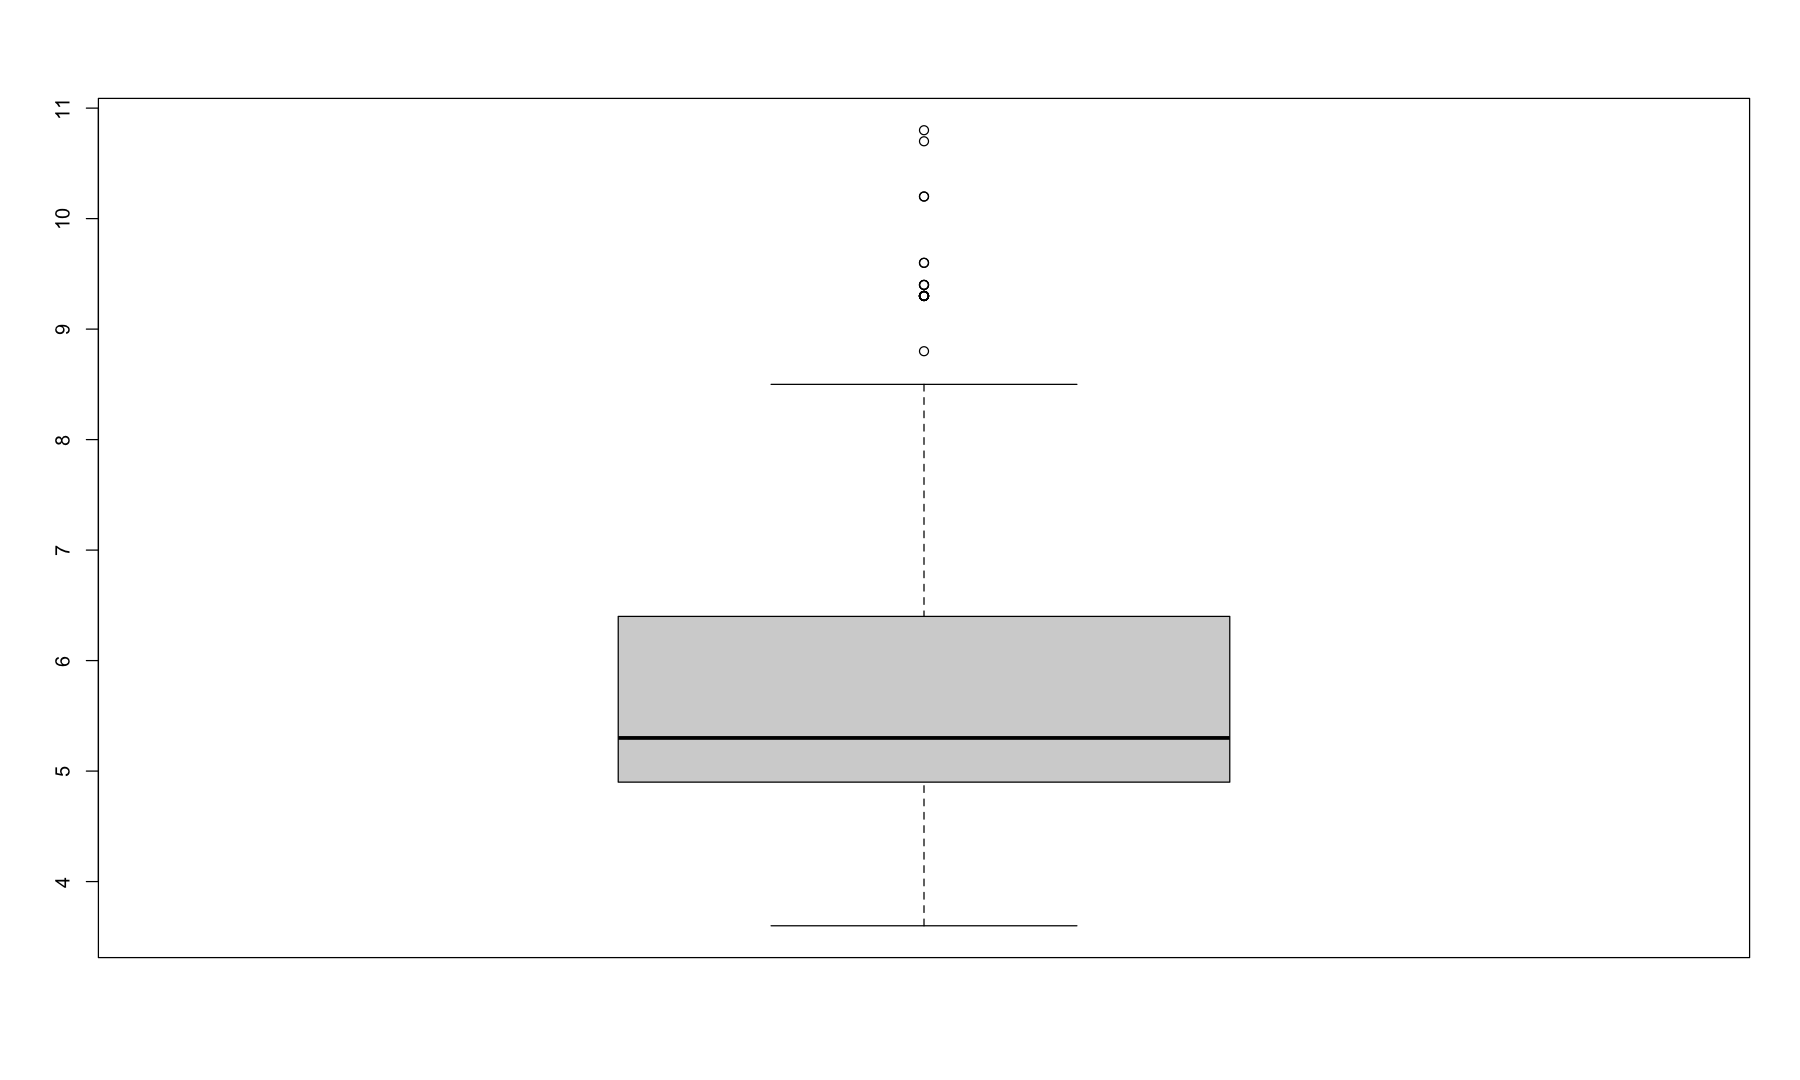

In [63]:
par(bg = 'white')
boxplot(Ford_Mondeo$fuel_consumption_l_100km)

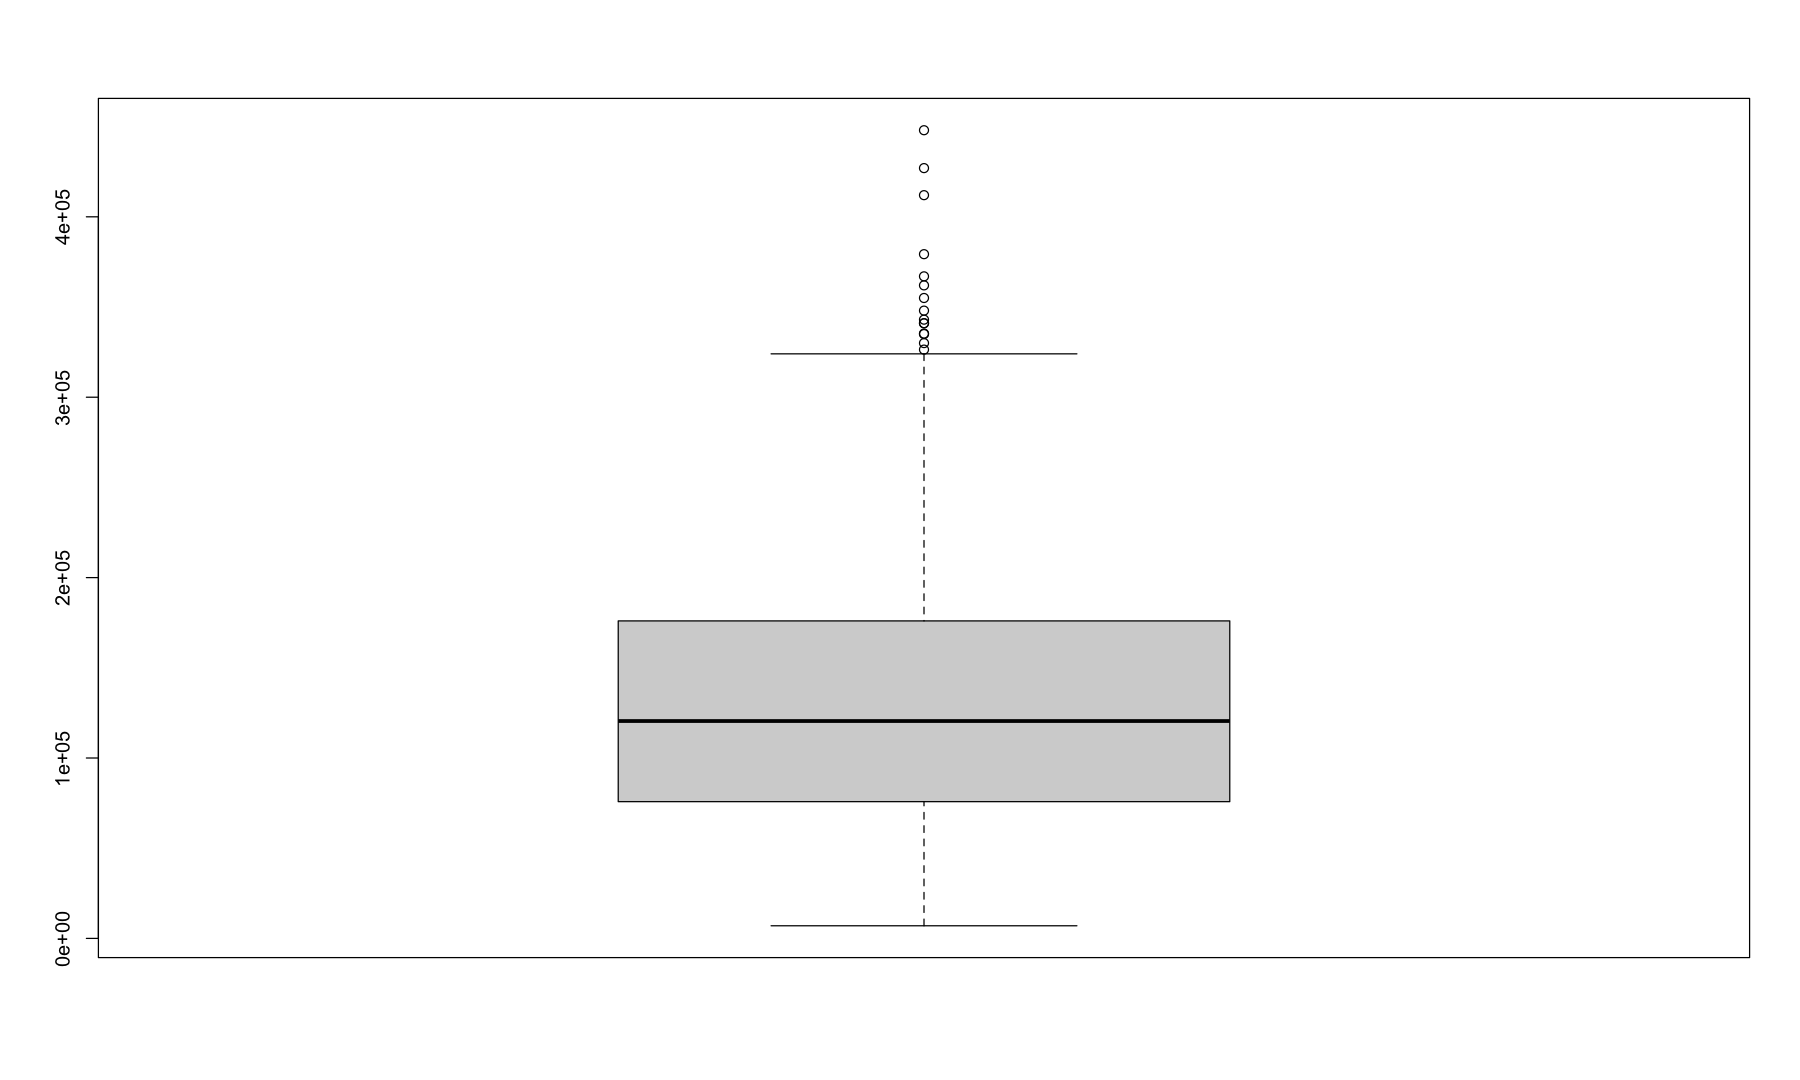

In [64]:
par(bg = 'white')
boxplot(Ford_Mondeo$mileage_in_km)

## 이상치 제거

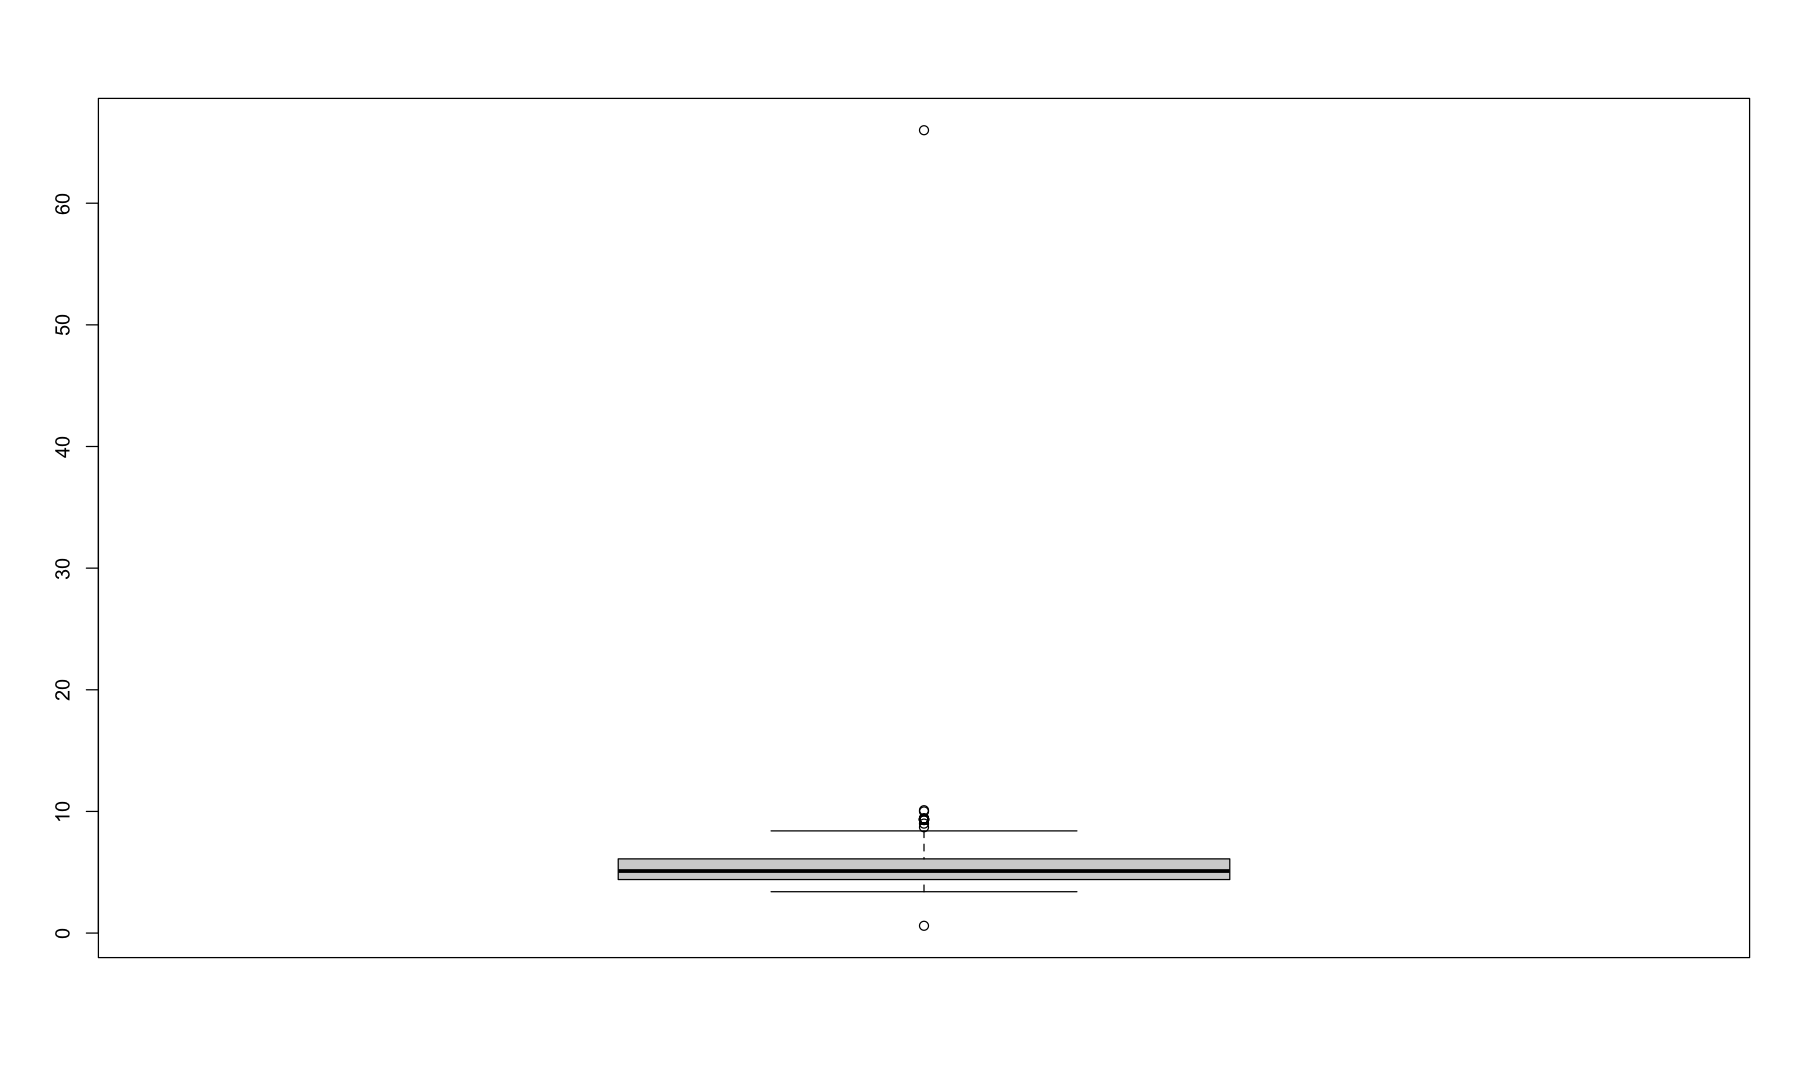

In [4]:
par(bg = 'white')
boxplot(Ford_Focus$fuel_consumption_l_100km)

In [5]:
table(Ford_Focus$fuel_consumption_l_100km)
Ford_Focus <- subset(Ford_Focus, fuel_consumption_l_100km != '66')
Ford_Focus <- subset(Ford_Focus, fuel_consumption_l_100km != '0.6')


 0.6  3.4  3.5  3.6  3.7  3.8  3.9    4  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8 
   1   26   36   37   45  216    8   53   57  192   42  116   85   39  112  343 
 4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9    6  6.1  6.2  6.3  6.4 
  66   78  131   69   92   58  146  125   18   42  138   74   78   10   35   43 
 6.5  6.6  6.7  6.8  6.9    7  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9    8 
  10   86  144   98   14   38   21   38   17    1   15    7   57    3   62   13 
 8.1  8.2  8.3  8.4  8.7    9  9.3  9.4   10 10.1   66 
   2   20    6    4    1    1    8    7    1    1    1 

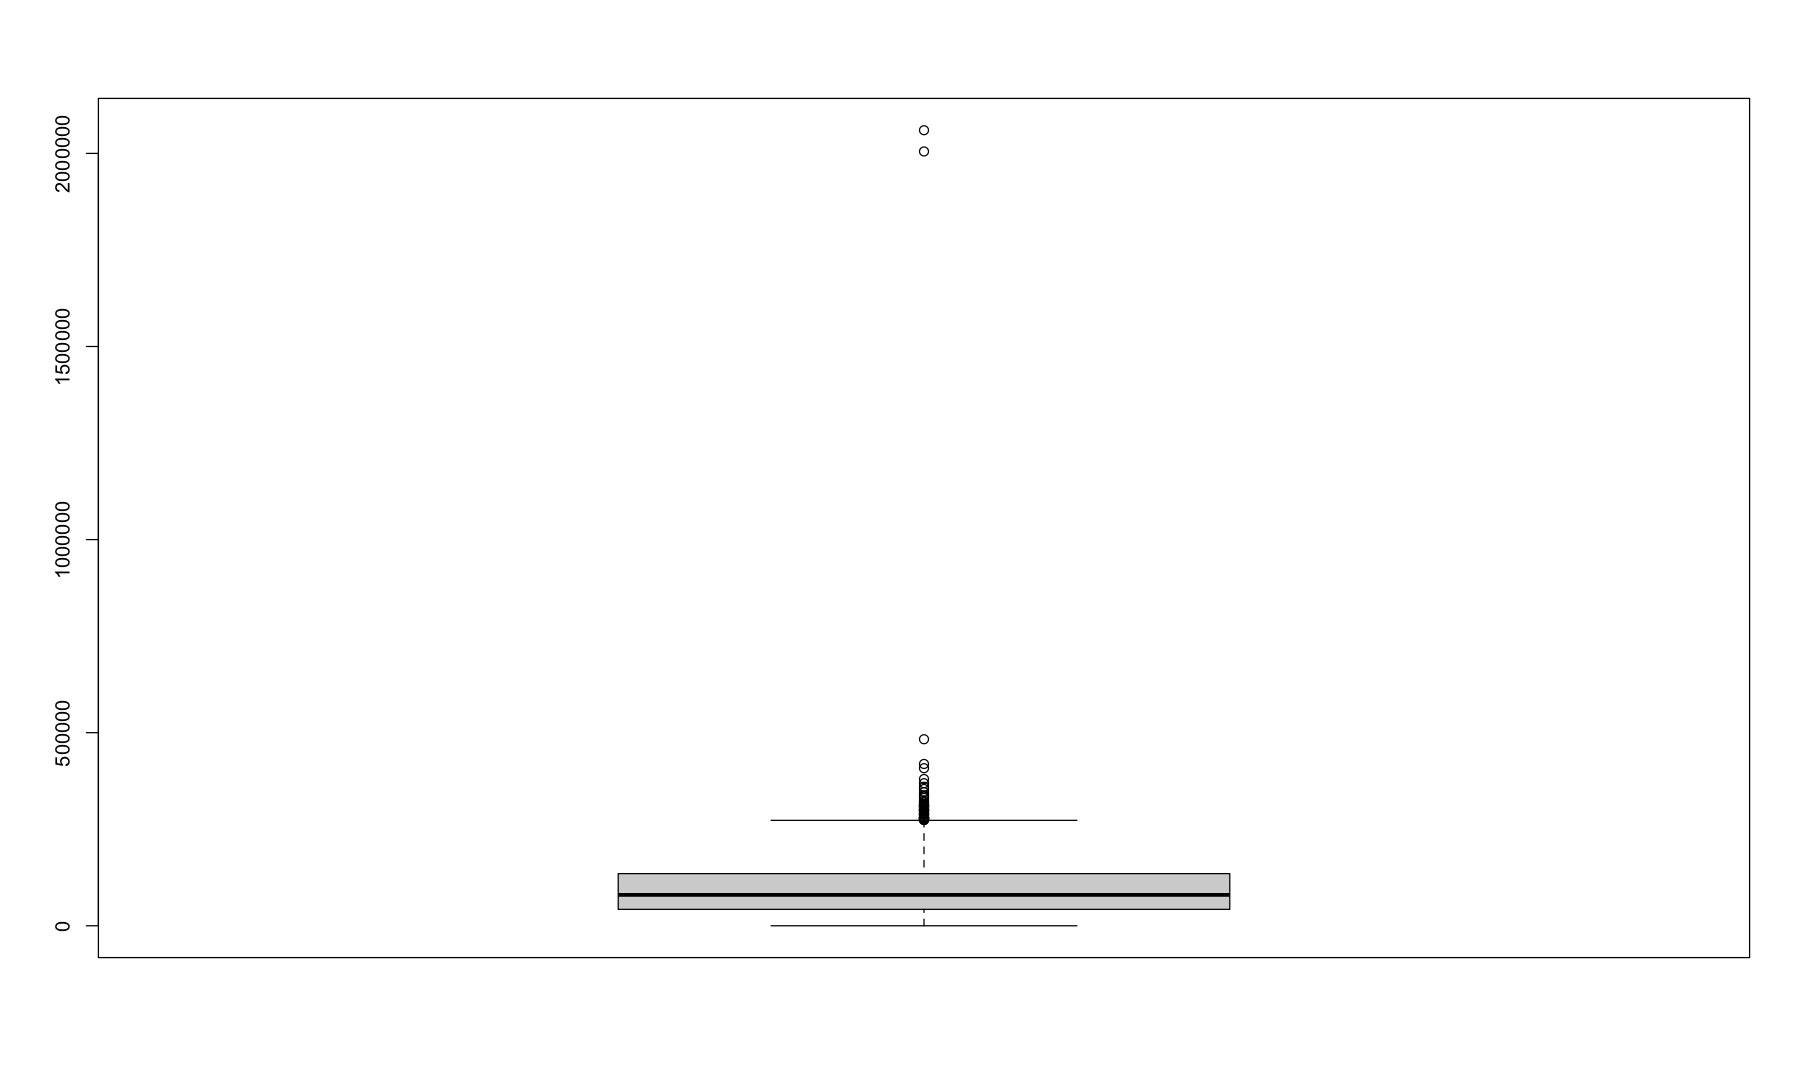

In [6]:
par(bg = 'white')
boxplot(Ford_Focus$mileage_in_km)

In [7]:
Ford_Focus <- subset(Ford_Focus, mileage_in_km != '2060000')
Ford_Focus <- subset(Ford_Focus, mileage_in_km != '2005002')
table(Ford_Focus$mileage_in_km)


     1      2      5      6      7      8     10     12     13     14     15 
     1      1      9      1      6      2     16      1      1      1      9 
    20     25     32     40     50     59    100    150    250    360    550 
     1      1      1      1     11      5      9      1      1      1      1 
   594    800   1001   1050   1100   1500   1513   1650   1953   2000   2100 
     1      1      1      1      1      5      1      1      2      1      1 
  2156   2400   2433   2500   2830   3000   3500   3520   3830   3860   3950 
     1      1      1      3      1      3      4      1      1      1      1 
  4350   4386   5000   5117   5361   5408   5500   6000   6300   6500   6600 
     1      1      5      1      1      1      2      2      1      1      1 
  6693   7150   7280   7400   7500   7557   7610   7728   8000   8012   8034 
     1      2      1      1      3      1      1      1      3      1      1 
  8188   8199   8230   8283   8290   8377   8459   8582   8631 

In [8]:
head(Ford_Focus)
ncol(head(Ford_Focus))
a <- Ford_Focus[-14]

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white,k_group
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2001,1500,75,1,1,6.6,287000,1,0,0,0,0,0,1
2,2001,1000,101,1,1,7.0,160000,1,0,0,0,0,0,3
3,2001,2750,101,1,1,7.0,160000,1,0,0,0,0,0,3
4,2001,600,101,1,1,7.0,145000,1,0,0,0,0,0,3
5,2001,600,101,1,1,6.8,226000,1,0,0,0,0,0,1
6,2001,3000,101,1,1,7.3,83791,1,0,0,0,0,0,3


[1] 14

In [9]:
head(Ford_Focus)

,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white,k_group
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2001,1500,75,1,1,6.6,287000,1,0,0,0,0,0,1
2,2001,1000,101,1,1,7.0,160000,1,0,0,0,0,0,3
3,2001,2750,101,1,1,7.0,160000,1,0,0,0,0,0,3
4,2001,600,101,1,1,7.0,145000,1,0,0,0,0,0,3
5,2001,600,101,1,1,6.8,226000,1,0,0,0,0,0,1
6,2001,3000,101,1,1,7.3,83791,1,0,0,0,0,0,3


In [24]:
# 객관식 함수 모음
myTest <- function(A, dataName, coln, ntreecount, per) {
  result <- numeric(A) 
  result2 <- numeric(A) 

cat("------------------------------------\n")
cat("예측율\n")
# 라이브러리 받기
library(caret)
library(e1071)
library(nnet)
library(randomForest)
for(i in 1:A) {
sampA <- createDataPartition(dataName$price_in_euro, p = per, list = F)
# 학습용    
data.trA <- dataName[sampA,]
# 검증용
data.testA <- dataName[-sampA,]
# 문제
xA <- subset(data.testA, select = - price_in_euro)
# 답
yA <- data.testA$price_in_euro
# 문제풀기  ( 랜덤 포레스트)
rfA <- randomForest(price_in_euro ~ ., data=data.trA, ntree = ntreecount )
# ( SVM )
model <- svm(price_in_euro ~ ., data=data.trA)
# 인공신경망
model.nnet <- nnet(price_in_euro ~ ., data=data.trA, size = 3) # size : 층 갯수 

# 예측
# 랜덤 포레스트
predA <- predict(rfA, xA)

# SVM
pred2A <- predict(model,xA)

# 랜덤 포레스트


  mape <- 100 -(mean(abs((predA - yA) / yA)) * 100)
  mape2 <- 100 -(mean(abs((pred2A - yA) / yA)) * 100)

 result[i] <- mape
 result2[i] <- mape2

  cat(i, "번째 MAPE RandomForest:", round(mape, 2), "%\n")
  cat(i, "번째 MAPE SVM:", round(mape2, 2), "%\n")
}
# SVM




cat("------------------------------------\n")
cat("평균 MAPE RandomForest:", round(mean(result), 2), "%\n")
cat("평균 MAPE SVM:", round(mean(result2), 2), "%\n")
cat("------------------------------------\n")

}

In [25]:
myTest(A = 10, dataName = Ford_Focus, coln = 5, ntreecount = 150,per = 0.7) 

------------------------------------
예측율
# weights:  43
initial  value 680646418528.683472 
final  value 680620196977.000000 
converged
1 번째 MAPE RandomForest: 81.87 %
1 번째 MAPE SVM: 83.01 %
# weights:  43
initial  value 679940391117.924194 
final  value 679912643635.000000 
converged
2 번째 MAPE RandomForest: 81.2 %
2 번째 MAPE SVM: 82.4 %
# weights:  43
initial  value 678720216755.213013 
final  value 678671803688.000000 
converged
3 번째 MAPE RandomForest: 81.09 %
3 번째 MAPE SVM: 82.02 %
# weights:  43
initial  value 678270932451.318481 
final  value 678245641561.000000 
converged
4 번째 MAPE RandomForest: 82.19 %
4 번째 MAPE SVM: 81.95 %
# weights:  43
initial  value 684543183843.264038 
final  value 684521308228.000000 
converged
5 번째 MAPE RandomForest: 83.35 %
5 번째 MAPE SVM: 84.1 %
# weights:  43
initial  value 683066091944.971680 
final  value 683040208596.000000 
converged
6 번째 MAPE RandomForest: 82.37 %
6 번째 MAPE SVM: 83.1 %
# weights:  43
initial  value 680631195996.571899 
final  value

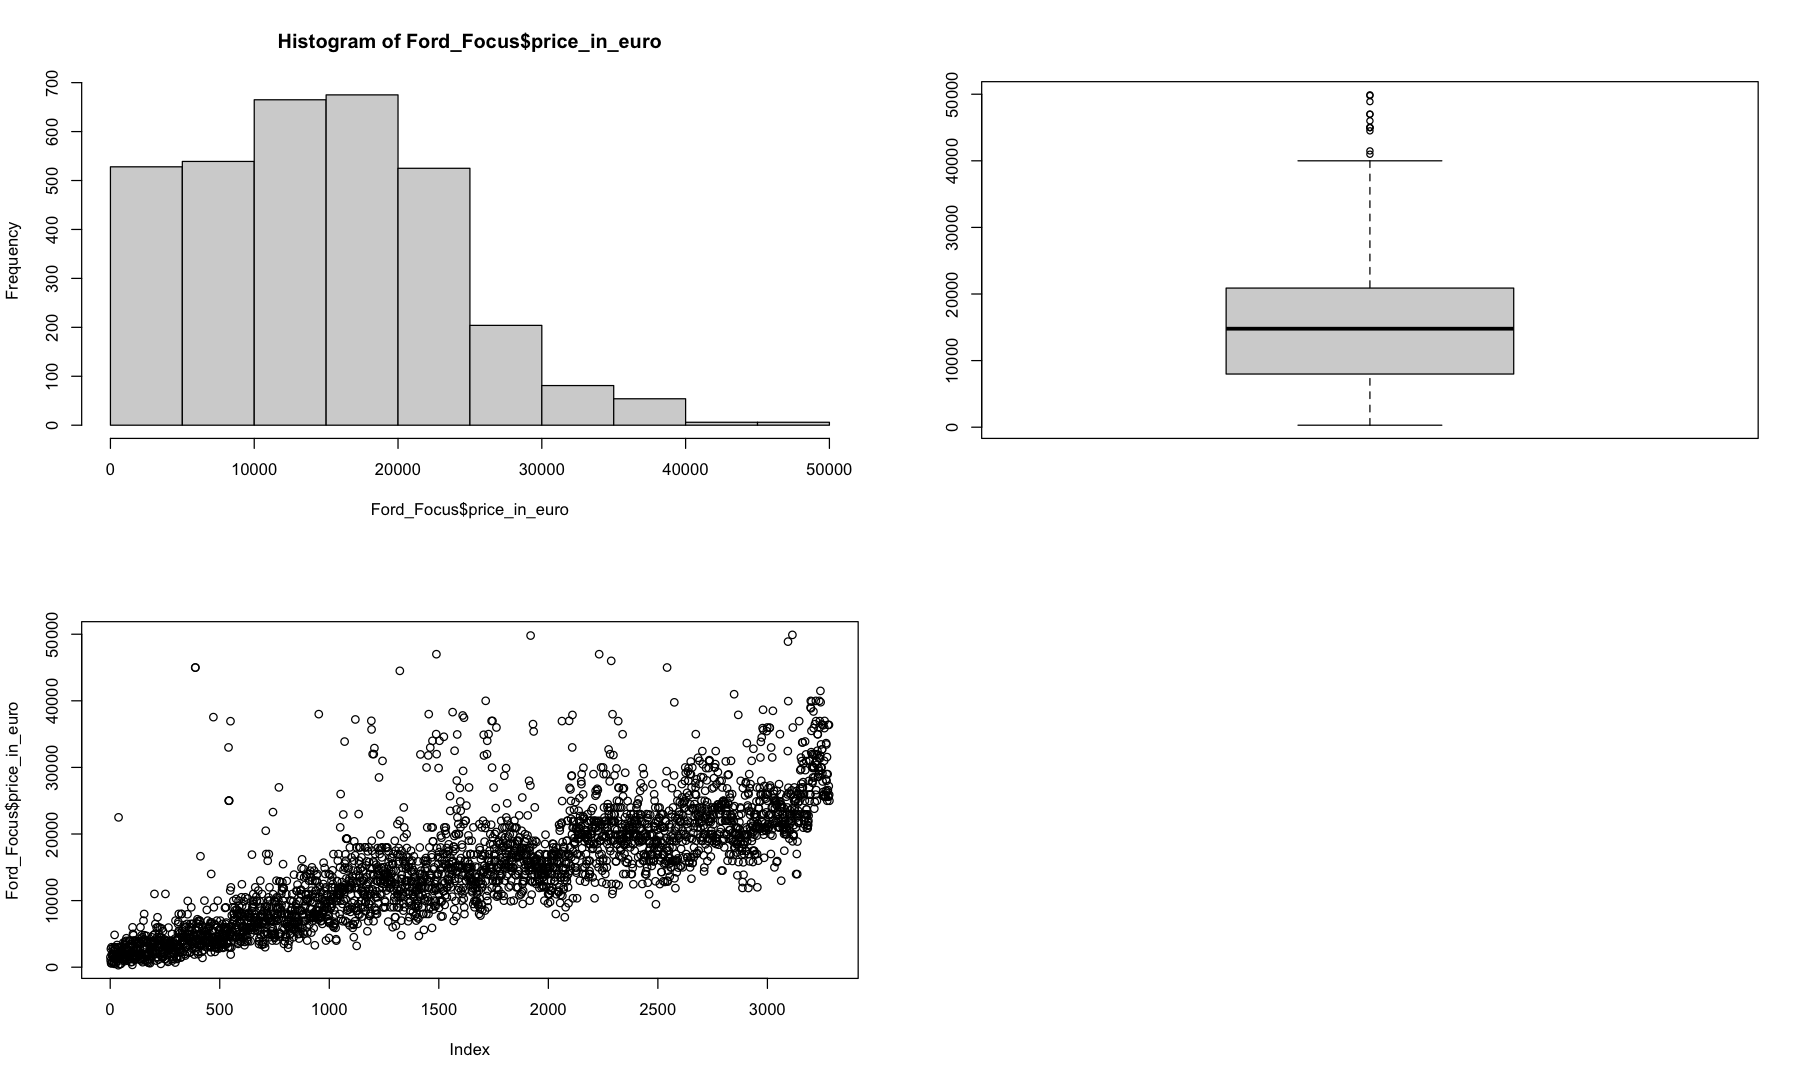

In [23]:
par(bg = 'white' , mfrow = c(2,2))
hist(Ford_Focus$price_in_euro)
boxplot(Ford_Focus$price_in_euro)
plot(Ford_Focus$price_in_euro)

In [13]:
Ford_Focus <- Ford_Focus[-14]

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


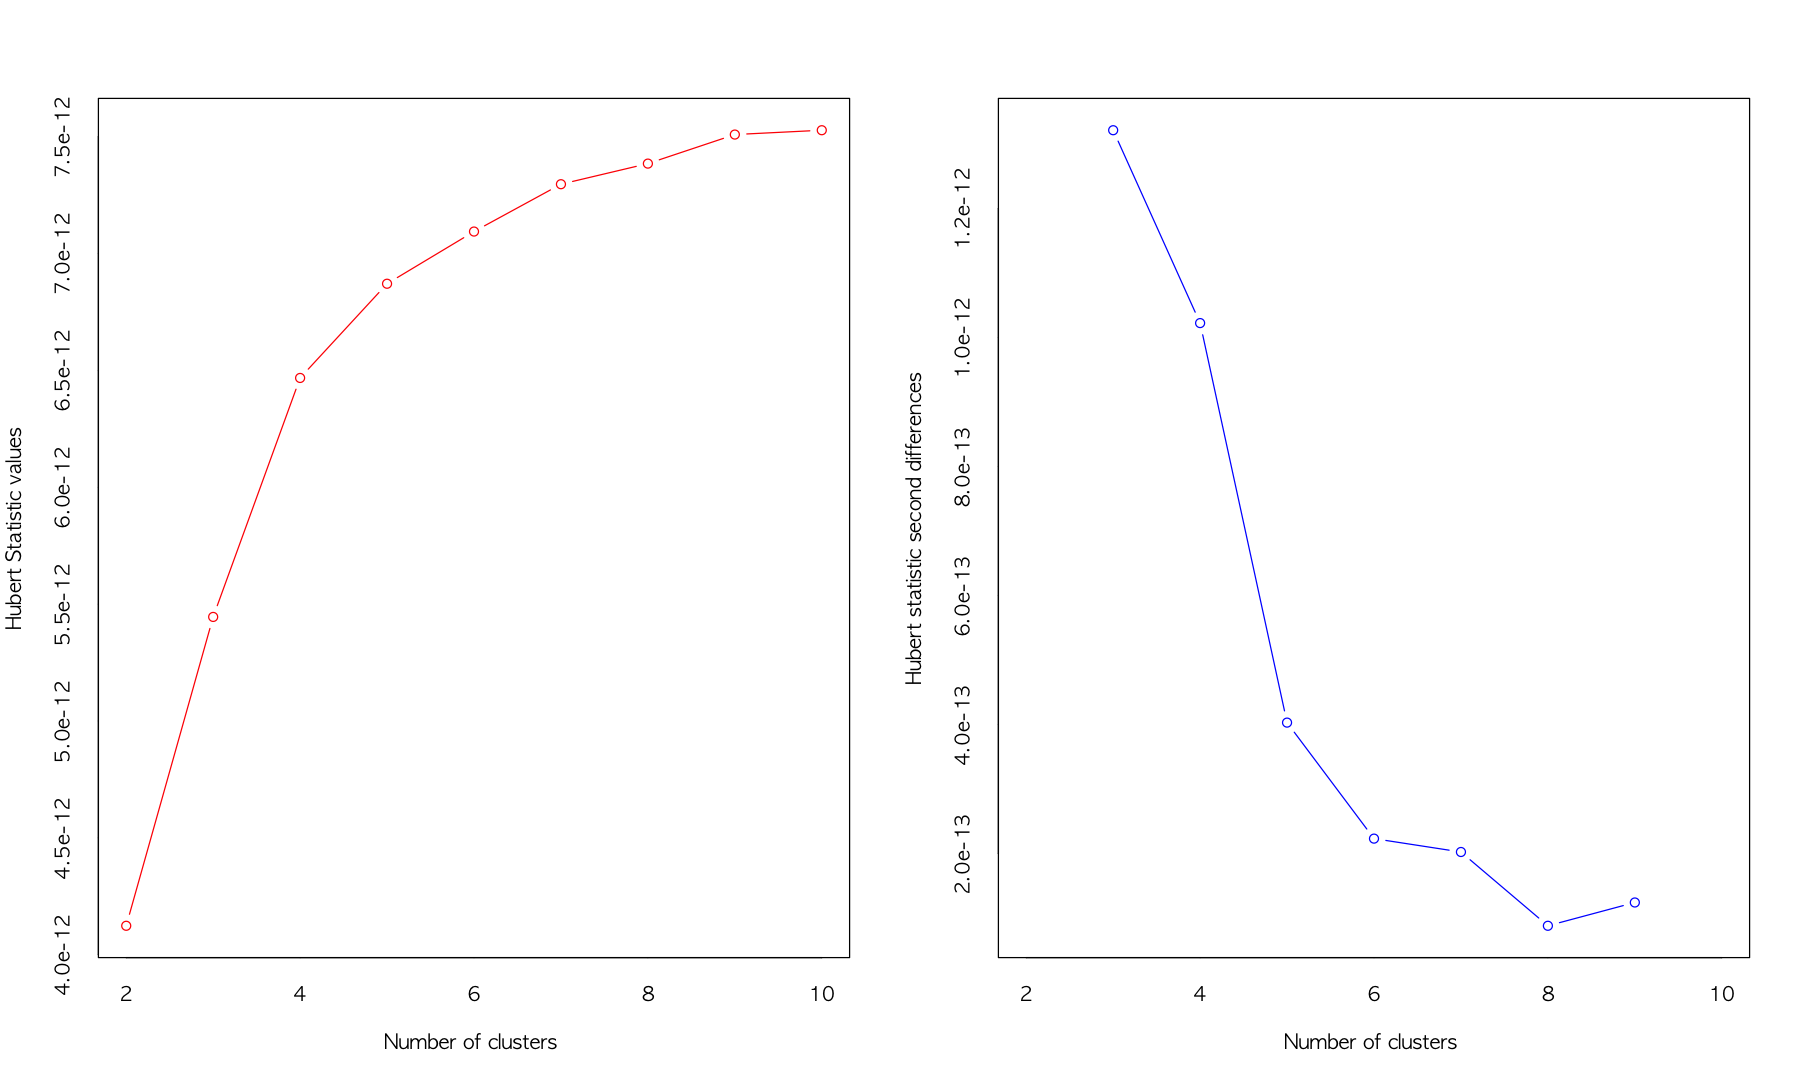

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


$All.index
        KL       CH  Hartigan     CCC     Scott      Marriot TrCovW      TraceW
2   0.6991 1539.983 2067.8717 62.1491  8125.599 326307460971     NA 81576865243
3   0.4876 2288.522  446.1178 43.9387 10314.485 376921456603     NA 41880161845
4  72.2239 1881.323 1818.9566 42.7054 12317.711 364023845051     NA 22751490316
5   0.0308 2647.643  785.5303 38.0669 13519.868 394386080288     NA 15775443212
6   0.6346 2781.950 2435.8966 34.4728 14482.937 423529475844     NA 11764707662
7   4.4924 4446.176  751.1278 35.4672 15601.354 410040134038     NA  8368166001
8   0.9821 4790.645 1134.0449 34.4792 16418.861 417508893397     NA  6523576459
9   0.5331 5783.316 1316.6946 32.6486 17059.833 434689540594     NA  5366537538
10  1.0028 7352.208  215.1031 32.2941 17733.621 437080621650     NA  4370806217
   Friedman    Rubin Cindex     DB Silhouette   Duda  Pseudot2   Beale
2   10.8823  11.8823 0.1565 0.7137     0.5739 0.6761 1041.5700  0.1596
3   22.1452  23.1452 0.1255 0.7022     0.5504 1.0191  -38.1401 -0.0062
4   41.6049  42.6049 0.1199 0.6187     0.5741 1.3598 -446.6702 -0.0881
5   60.4451  61.4451 0.1019 0.6130     0.5461 0.8315  251.0582  0.0675
6   81.3925  82.3925 0.0882 0.6177     0.5352 1.2930 -179.2536 -0.0754
7  114.8347 115.8347 0.0822 0.6100     0.5504 3.0067 -390.4375 -0.2220
8  147.5878 148.5878 0.0854 0.6082     0.5388 0.6055  533.6020  0.2147
9  179.6237 180.6237 0.0772 0.6212     0.5318 1.7244 -232.7309 -0.1397
10 220.7723 221.7723 0.0759 0.6117     0.5422 1.1111  -56.7795 -0.0332
   Ratkowsky        Ball Ptbiserial   Frey McClain   Dunn Hubert SDindex
2     0.3996 81967374242     0.5857 0.6289  0.3843 0.0014      0  0.0006
3     0.4407 33519213161     0.5998 0.4395  0.5360 0.0009      0  0.0005
4     0.3977 22129537686     0.6018 1.2493  0.5468 0.0017      0  0.0005
5     0.3908 11386955181     0.5467 1.1095  0.6563 0.0013      0  0.0006
6     0.3673  7654764137     0.5028 0.6021  0.7387 0.0009      0  0.0007
7     0.3567  3763614200     0.4848 1.2136  0.7304 0.0011      0  0.0008
8     0.3375  2678931615     0.4580 0.9682  0.7778 0.0006      0  0.0009
9     0.3221  1768788411     0.4367 0.9397  0.8028 0.0006      0  0.0010
10    0.3087  1135320998     0.4192 1.9938  0.8203 0.0020      0  0.0013
      Dindex   SDbw
2  4011.8980 1.5755
3  2819.9586 0.7920
4  2154.5328 0.4590
5  1746.3711 0.3800
6  1485.5720 0.3573
7  1244.6716 0.2958
8  1120.8190 0.2512
9  1004.1635 0.2305
10  901.0452 0.1955

$All.CriticalValues
   CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2          0.3131           4768.948       0.6896
3          0.3098           4543.239       1.0000
4          0.2991           3954.896       1.0000
5          0.2975           2926.150       0.7951
6          0.2877           1958.580       1.0000
7          0.2694           1586.704       1.0000
8          0.1546           4478.634       0.6443
9          0.2728           1476.677       1.0000
10         0.2591           1623.907       1.0000

$Best.nc
                     KL       CH Hartigan     CCC    Scott     Marriot TrCovW
Number_clusters  4.0000   10.000    7.000  2.0000    3.000           4   -Inf
Value_Index     72.2239 7352.208 1684.769 62.1491 2188.886 43259846789      3
                     TraceW Friedman   Rubin Cindex     DB Silhouette   Duda
Number_clusters 20568031869  41.1486 -0.7172 0.0759 0.6082     0.5741 0.6761
Value_Index              10   8.0000 10.0000 8.0000 4.0000     2.0000 2.0000
                PseudoT2  Beale Ratkowsky        Ball PtBiserial Frey McClain
Number_clusters  1041.57 0.1596    0.4407 48448161080     0.6018   NA  0.3843
Value_Index         2.00 3.0000    3.0000           4     1.0000    2 10.0000
                 Dunn Hubert SDindex Dindex   SDbw
Number_clusters 0.002      0   5e-04      0 0.1955
Value_Index     0.000      3   0e+00     10 4.0000

$Best.partition
   [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

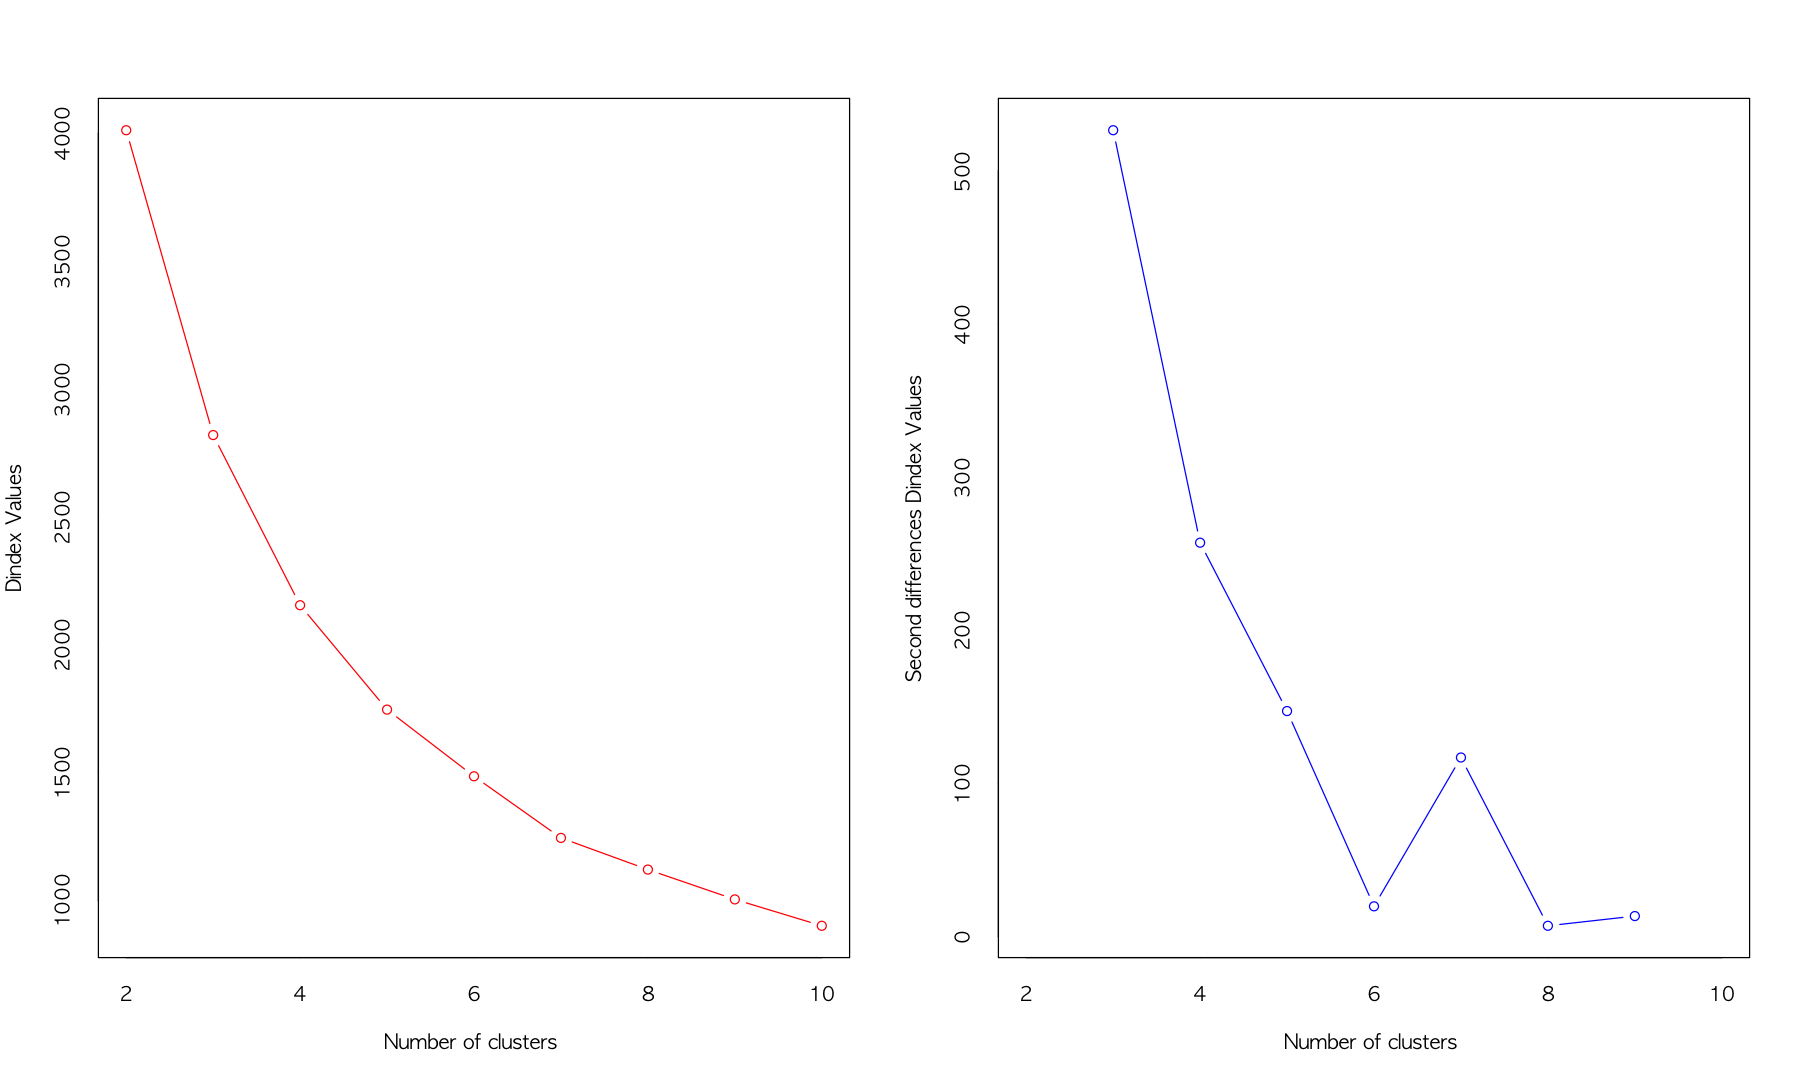

In [14]:
par(family = "AppleGothic", bg = 'white') 
nc <- NbClust(Ford_Focus$price_in_euro, min.nc = 2, max.nc = 10, method = 'kmeans')
nc

[1] "lm"

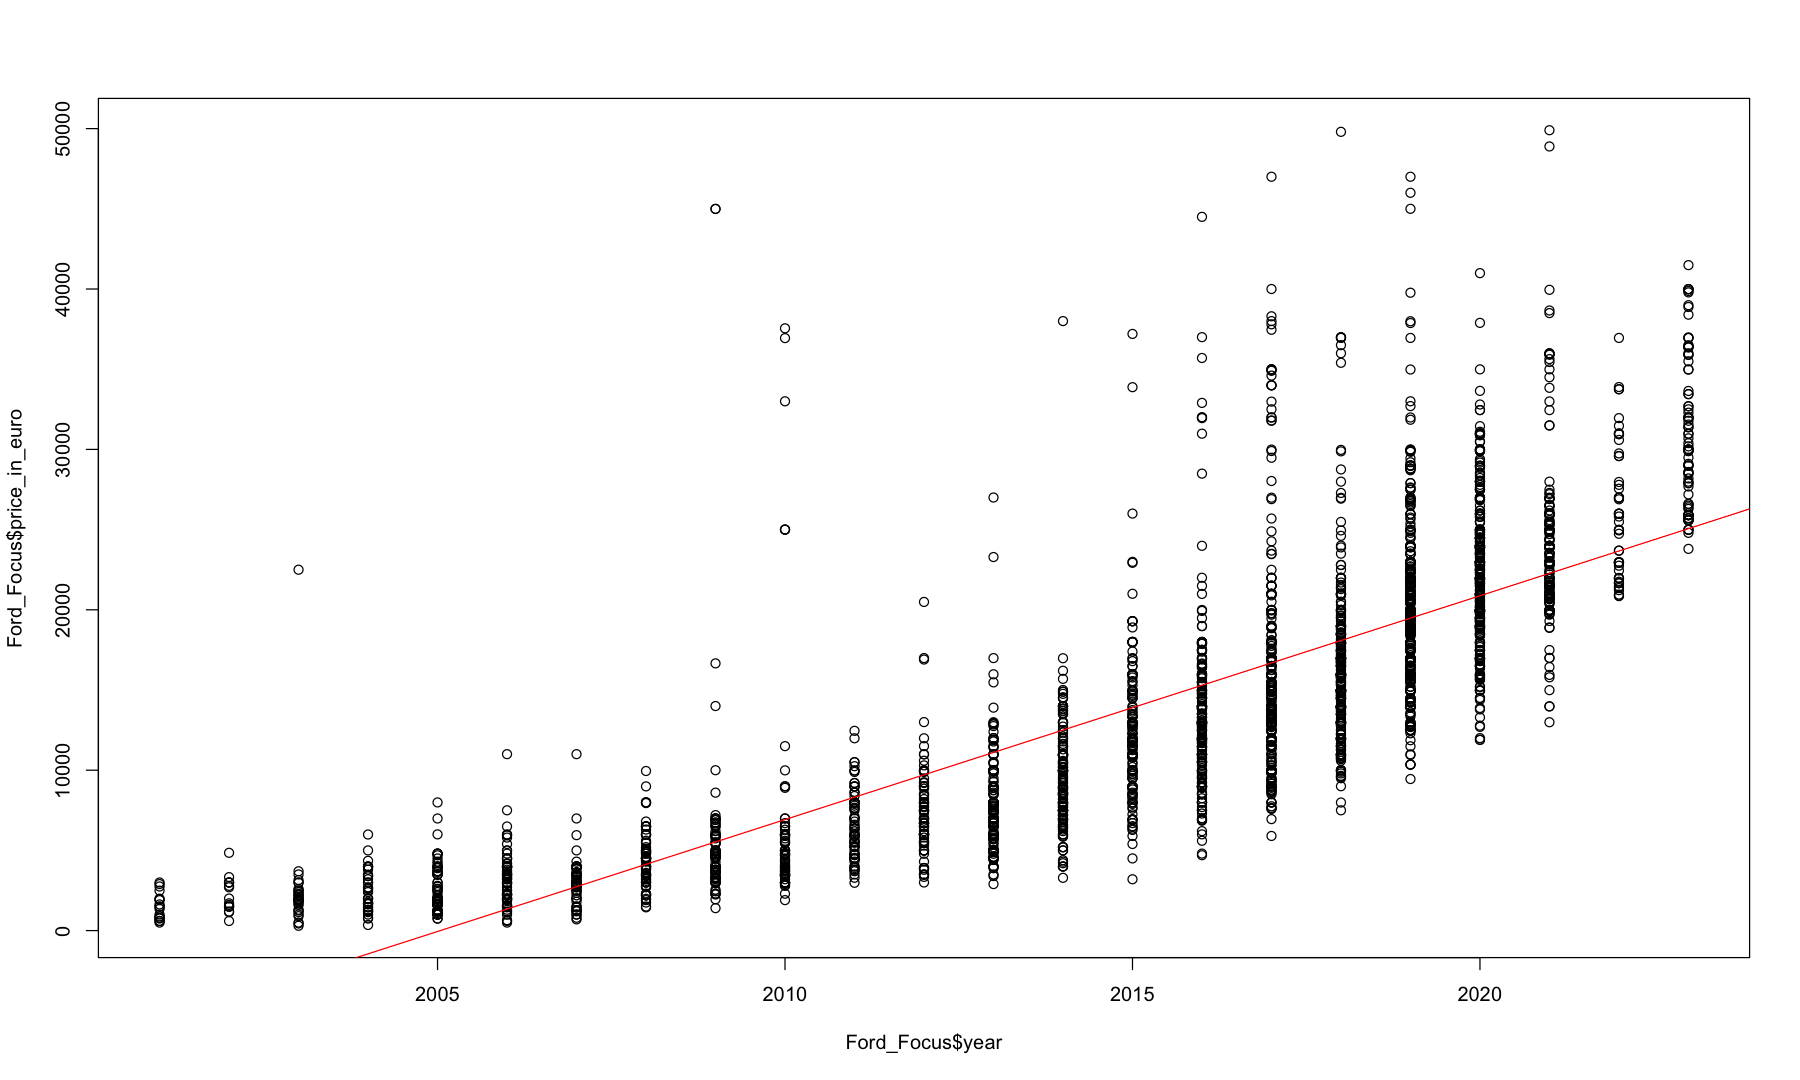

In [15]:
# 회귀선(중심선, 평균선)
par(bg = 'white')
plot(Ford_Focus$price_in_euro ~ Ford_Focus$year)

# 회귀식
# 추세를 알아보는 데이터
r <- lm(Ford_Focus$price_in_euro ~ Ford_Focus$year)
abline(r, col='red')
class(r)

In [16]:
model <- lm(price_in_euro ~ ., data=Ford_Focus)
model


Call:
lm(formula = price_in_euro ~ ., data = Ford_Focus)

Coefficients:
             (Intercept)                      year                  power_ps  
              -2.013e+06                 1.002e+03                 4.064e+01  
       transmission_type                 fuel_type  fuel_consumption_l_100km  
              -7.035e+02                -1.826e+03                 1.474e+03  
           mileage_in_km                color_blue              color_silver  
              -3.744e-02                 5.334e+02                 8.066e+01  
               color_red                color_grey               color_black  
               8.559e+02                 3.938e+02                -1.984e+02  
             color_white  
                      NA  


In [17]:
summary(model)


Call:
lm(formula = price_in_euro ~ ., data = Ford_Focus)

Residuals:
   Min     1Q Median     3Q    Max 
-15389  -2025   -552   1260  32562 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.013e+06  5.341e+04 -37.699  < 2e-16 ***
year                      1.002e+03  2.634e+01  38.041  < 2e-16 ***
power_ps                  4.064e+01  2.121e+00  19.157  < 2e-16 ***
transmission_type        -7.035e+02  1.704e+02  -4.127 3.76e-05 ***
fuel_type                -1.826e+03  2.215e+02  -8.242 2.43e-16 ***
fuel_consumption_l_100km  1.474e+03  1.126e+02  13.091  < 2e-16 ***
mileage_in_km            -3.744e-02  1.566e-03 -23.908  < 2e-16 ***
color_blue                5.334e+02  2.399e+02   2.224  0.02623 *  
color_silver              8.066e+01  2.348e+02   0.344  0.73123    
color_red                 8.559e+02  2.764e+02   3.096  0.00198 ** 
color_grey                3.938e+02  2.353e+02   1.673

 Adjusted R-squared: 0.8221

In [18]:
reduced <- step(model, direction = "backward")  # nolint

Start:  AIC=53958.94
price_in_euro ~ year + power_ps + transmission_type + fuel_type + 
    fuel_consumption_l_100km + mileage_in_km + color_blue + color_silver + 
    color_red + color_grey + color_black + color_white


Step:  AIC=53958.94
price_in_euro ~ year + power_ps + transmission_type + fuel_type + 
    fuel_consumption_l_100km + mileage_in_km + color_blue + color_silver + 
    color_red + color_grey + color_black

                           Df  Sum of Sq        RSS   AIC
- color_silver              1 1.6155e+06 4.4783e+10 53957
- color_black               1 9.5757e+06 4.4791e+10 53958
<none>                                   4.4782e+10 53959
- color_grey                1 3.8337e+07 4.4820e+10 53960
- color_blue                1 6.7707e+07 4.4849e+10 53962
- color_red                 1 1.3123e+08 4.4913e+10 53967
- transmission_type         1 2.3320e+08 4.5015e+10 53974
- fuel_type                 1 9.2993e+08 4.5712e+10 54024
- fuel_consumption_l_100km  1 2.3461e+09 4.7128e+10 

In [19]:
summary(reduced)


Call:
lm(formula = price_in_euro ~ year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_blue + 
    color_red + color_grey, data = Ford_Focus)

Residuals:
   Min     1Q Median     3Q    Max 
-15334  -2039   -553   1275  32375 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.013e+06  5.321e+04 -37.826  < 2e-16 ***
year                      1.002e+03  2.625e+01  38.161  < 2e-16 ***
power_ps                  4.025e+01  2.086e+00  19.295  < 2e-16 ***
transmission_type        -7.060e+02  1.702e+02  -4.148 3.44e-05 ***
fuel_type                -1.856e+03  2.198e+02  -8.445  < 2e-16 ***
fuel_consumption_l_100km  1.484e+03  1.120e+02  13.253  < 2e-16 ***
mileage_in_km            -3.764e-02  1.557e-03 -24.178  < 2e-16 ***
color_blue                5.706e+02  1.781e+02   3.204 0.001370 ** 
color_red                 8.933e+02  2.303e+02   3.879 0.000107 ***
color_grey                

In [20]:
  #  - 3613  >    >      +3613

In [21]:
#10^6

In [22]:
reduced


Call:
lm(formula = price_in_euro ~ year + power_ps + transmission_type + 
    fuel_type + fuel_consumption_l_100km + mileage_in_km + color_blue + 
    color_red + color_grey, data = Ford_Focus)

Coefficients:
             (Intercept)                      year                  power_ps  
              -2.013e+06                 1.002e+03                 4.025e+01  
       transmission_type                 fuel_type  fuel_consumption_l_100km  
              -7.060e+02                -1.856e+03                 1.484e+03  
           mileage_in_km                color_blue                 color_red  
              -3.764e-02                 5.706e+02                 8.933e+02  
              color_grey  
               4.334e+02  


In [65]:
write.csv(polo, file = "./file/polodata.csv", row.names = FALSE)
write.csv(golf, file = "./file/golfdata.csv", row.names = FALSE)
write.csv(tiguan, file = "./file/tiguandata.csv", row.names = FALSE)
write.csv(Ford_Focus, file = "./file/Ford_Focusdata.csv", row.names = FALSE)
write.csv(Ford_Fiesta, file = "./file/Ford_Fiestadata.csv", row.names = FALSE)
write.csv(Ford_Mondeo, file = "./file/Ford_Mondeodata.csv", row.names = FALSE)

In [66]:
write.csv(golf, file = "./file/golfdata.csv", row.names = FALSE)